In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 30)

In [25]:
data_cluster = pd.read_csv('../data/clustering_result_2.csv')
data_feat    = pd.read_csv('../data/data_feat.csv')
data_cluster = data_cluster[['data_id', 'cluster_label']]

In [26]:
feat_col = ['data_id'] + [data_feat.columns[i] for i in range(31, 111)]
feat_col

['data_id',
 'event_ctr_-30',
 'event_ctr_-7',
 'event_ctr_-3',
 'event_ctr_-1',
 'event_ctr_1',
 'event_ctr_3',
 'event_ctr_7',
 'event_ctr_30',
 'fatality_sum_-30',
 'fatality_sum_-7',
 'fatality_sum_-3',
 'fatality_sum_-1',
 'fatality_sum_1',
 'fatality_sum_3',
 'fatality_sum_7',
 'fatality_sum_30',
 'event_ctr_admin1_-30',
 'event_ctr_admin1_-7',
 'event_ctr_admin1_-3',
 'event_ctr_admin1_-1',
 'event_ctr_admin1_1',
 'event_ctr_admin1_3',
 'event_ctr_admin1_7',
 'event_ctr_admin1_30',
 'fatality_sum_admin1_-30',
 'fatality_sum_admin1_-7',
 'fatality_sum_admin1_-3',
 'fatality_sum_admin1_-1',
 'fatality_sum_admin1_1',
 'fatality_sum_admin1_3',
 'fatality_sum_admin1_7',
 'fatality_sum_admin1_30',
 'event_ctr_admin2_-30',
 'event_ctr_admin2_-7',
 'event_ctr_admin2_-3',
 'event_ctr_admin2_-1',
 'event_ctr_admin2_1',
 'event_ctr_admin2_3',
 'event_ctr_admin2_7',
 'event_ctr_admin2_30',
 'fatality_sum_admin2_-30',
 'fatality_sum_admin2_-7',
 'fatality_sum_admin2_-3',
 'fatality_sum_admin

In [27]:
data_cluster = data_cluster.merge(data_feat[feat_col], on='data_id', how='left')
data_cluster['cluster_label'] = data_cluster['cluster_label'].astype('object')

In [28]:
data_cluster = data_cluster.set_index(['data_id', 'cluster_label'])
data_cluster.reset_index(level=0, drop=True, inplace=True)

In [29]:
data_cluster.groupby('cluster_label').mean()

,event_ctr_-30,event_ctr_-7,event_ctr_-3,event_ctr_-1,event_ctr_1,event_ctr_3,event_ctr_7,event_ctr_30,fatality_sum_-30,fatality_sum_-7,fatality_sum_-3,fatality_sum_-1,fatality_sum_1,fatality_sum_3,fatality_sum_7,fatality_sum_30,event_ctr_admin1_-30,event_ctr_admin1_-7,event_ctr_admin1_-3,event_ctr_admin1_-1,event_ctr_admin1_1,event_ctr_admin1_3,event_ctr_admin1_7,event_ctr_admin1_30,fatality_sum_admin1_-30,...,event_ctr_actor1_30,fatality_sum_actor1_-30,fatality_sum_actor1_-7,fatality_sum_actor1_-3,fatality_sum_actor1_-1,fatality_sum_actor1_1,fatality_sum_actor1_3,fatality_sum_actor1_7,fatality_sum_actor1_30,event_ctr_actor1_inter_-30,event_ctr_actor1_inter_-7,event_ctr_actor1_inter_-3,event_ctr_actor1_inter_-1,event_ctr_actor1_inter_1,event_ctr_actor1_inter_3,event_ctr_actor1_inter_7,event_ctr_actor1_inter_30,fatality_sum_actor1_inter_-30,fatality_sum_actor1_inter_-7,fatality_sum_actor1_inter_-3,fatality_sum_actor1_inter_-1,fatality_sum_actor1_inter_1,fatality_sum_actor1_inter_3,fatality_sum_actor1_inter_7,fatality_sum_actor1_inter_30
cluster_label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,572.700917,136.695413,61.258716,21.352294,21.249541,59.840367,135.271560,589.954128,3361.409174,1048.240367,658.240367,305.640367,371.906422,741.559633,1172.361468,3389.069725,16.416514,7.519266,4.933945,2.377982,2.420183,4.851376,8.326606,21.952294,831.719266,...,26.845872,562.576147,331.798165,269.570642,147.106422,176.818349,313.666055,405.656881,646.205505,11.200000,4.902752,3.036697,1.449541,1.434862,2.976147,5.200000,18.080734,402.884404,264.618349,215.368807,117.209174,149.493578,252.423853,326.308257,483.928440
1,2793.163411,658.916228,285.502630,96.883171,94.732156,280.976709,656.737040,2813.495116,3596.371150,842.457175,365.664162,127.117205,119.102930,359.676183,837.560856,3607.644628,47.922990,14.072502,7.512397,3.431255,1.315177,4.108941,10.086777,44.120962,89.925244,...,37.205485,69.960180,20.324944,11.481593,5.373779,2.349361,7.258077,15.908715,66.285875,23.411721,7.187453,3.953418,1.791134,0.730654,2.187077,5.235162,21.243802,36.785500,11.718633,6.962434,3.502630,1.376784,3.813298,8.404207,34.764463
2,349.463112,81.179583,34.921265,11.581732,11.606944,34.774334,81.105394,347.229180,1992.560240,411.646621,165.783840,50.825790,49.665427,167.997727,404.092168,1806.423641,5.071296,1.645175,0.881380,0.367638,0.355445,0.863815,1.625749,4.930151,78.702831,...,8.863402,119.605084,33.819797,15.589791,6.201901,6.145898,16.270924,33.544121,111.256458,5.474892,1.628849,0.837363,0.335193,0.322381,0.833437,1.629676,5.183096,83.272784,26.282496,12.747055,5.372184,5.304608,13.623683,26.353585,73.489771
3,1463.370982,337.489140,142.319722,47.165943,57.364900,163.419635,363.705474,1513.340573,2603.673328,574.990443,249.694179,79.657689,107.121633,303.485665,665.529974,2701.960904,39.590791,9.173762,3.627281,1.361425,6.349262,12.461338,19.470895,52.456125,106.765421,...,41.754127,85.379670,19.697654,8.218071,3.635969,16.320591,35.141616,56.863597,133.568202,16.986968,4.316247,1.714162,0.722850,3.257168,6.331885,9.759340,24.266725,49.886186,10.784535,4.374457,2.017376,11.807124,22.423979,35.680278,78.562989
4,2871.683808,674.636909,288.725485,97.460715,97.451753,289.914905,676.237797,2890.774036,3775.314104,880.960237,379.306795,125.568259,127.372053,378.215435,882.220482,3783.937440,8.752197,1.991212,0.822849,0.279300,0.274515,0.821021,2.004612,8.864352,13.764291,...,14.295832,19.192987,4.304707,1.770208,0.489689,0.535891,1.675977,4.122509,18.833116,6.641956,1.551727,0.644566,0.223614,0.219438,0.638563,1.544766,6.687462,7.097103,1.630036,0.627077,0.169407,0.164709,0.538589,1.368311,6.702602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1218.502488,312.983085,149.548259,58.916418,41.200995,122.214925,291.818905,1267.616915,2317.394030,561.855721,256.488557,85.103483,65.8

In [10]:
data_cluster_reshape = data_cluster.stack().reset_index()
data_cluster_reshape.columns = ['data_id', 'cluster_label', 'feature', 'result']
# rescale the result column
data_cluster_reshape['result'] = data_cluster_reshape.groupby('feature')['result'].transform(lambda x: x/(x.max()-x.min()))

In [45]:
def ClusterDisplay(col):
    _, ax=plt.subplots(1, 1, figsize=[30,10])
    label_order = data_cluster[col].groupby('cluster_label').mean().sort_values().index
    subdata = data_cluster[col].reset_index()
    sns.boxplot(data=subdata, x='cluster_label', y=col, order=label_order, ax=ax)
    plt.show()


### Level1: event counts

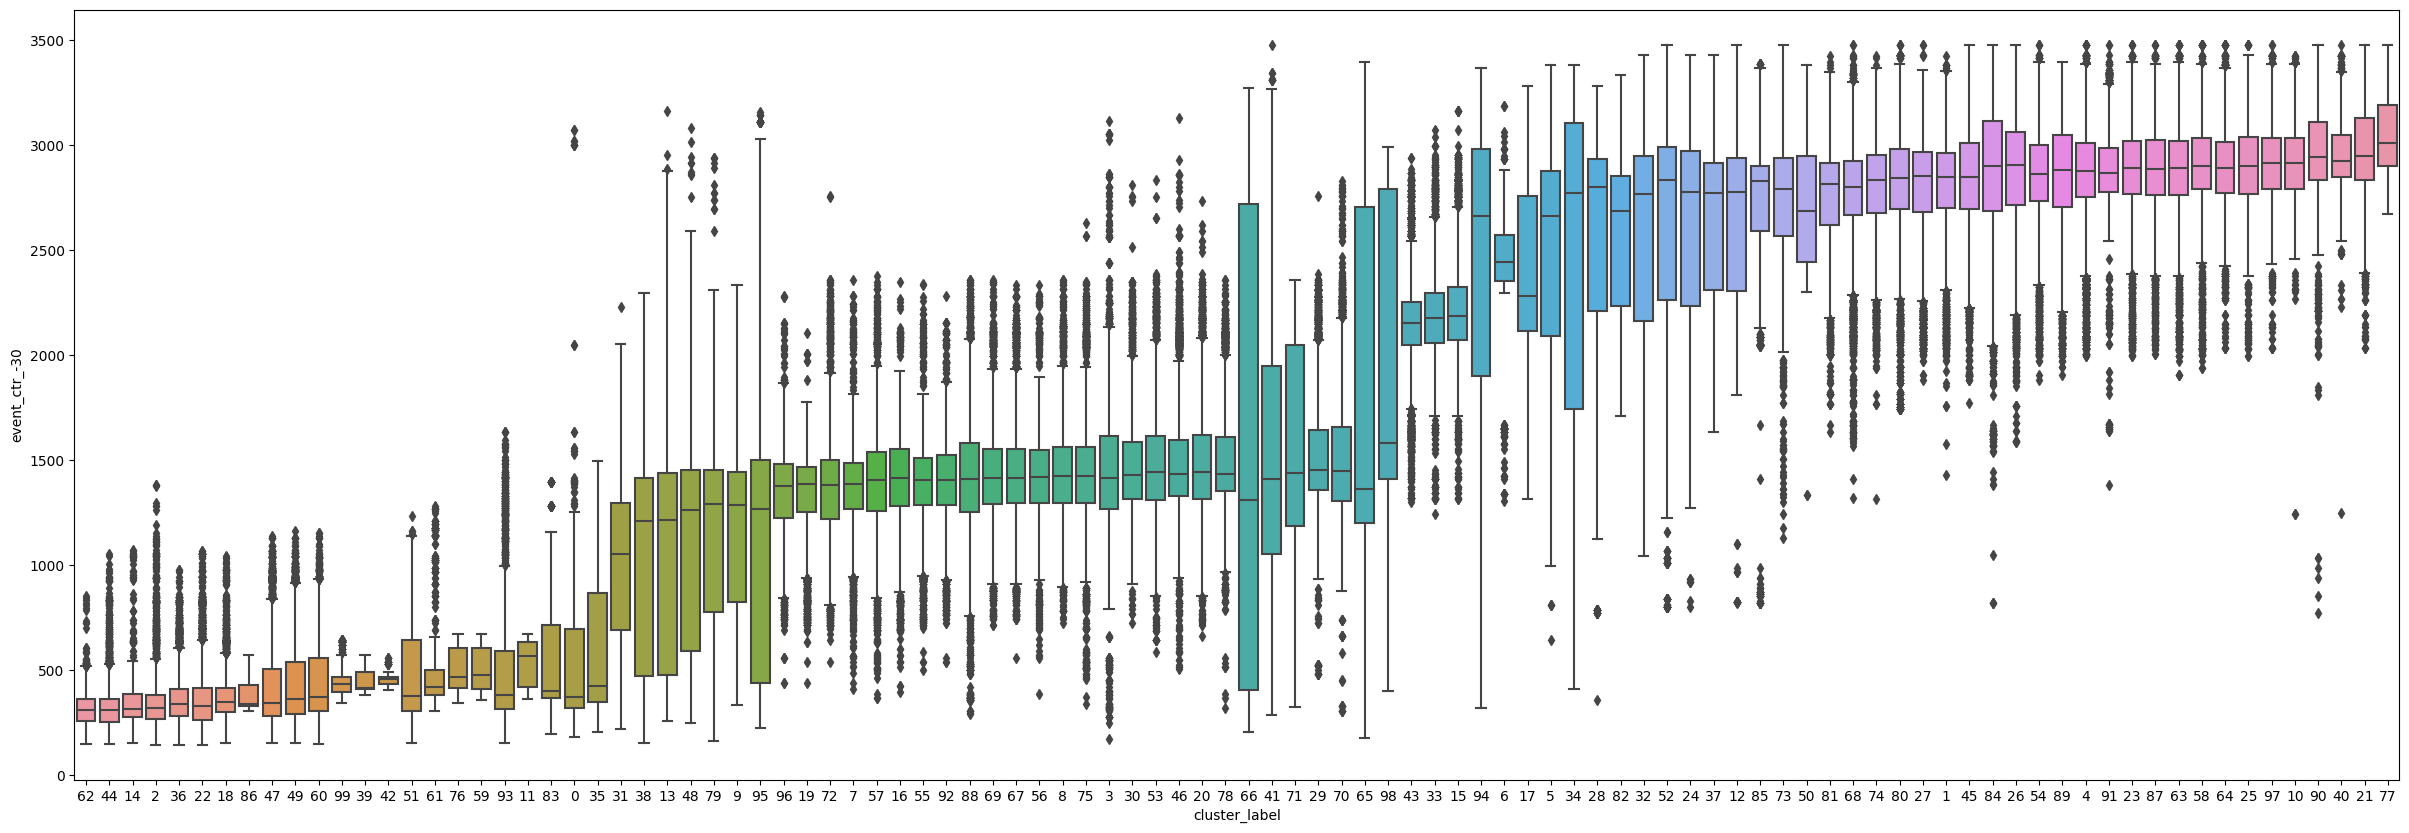

In [54]:
ClusterDisplay('event_ctr_-30')

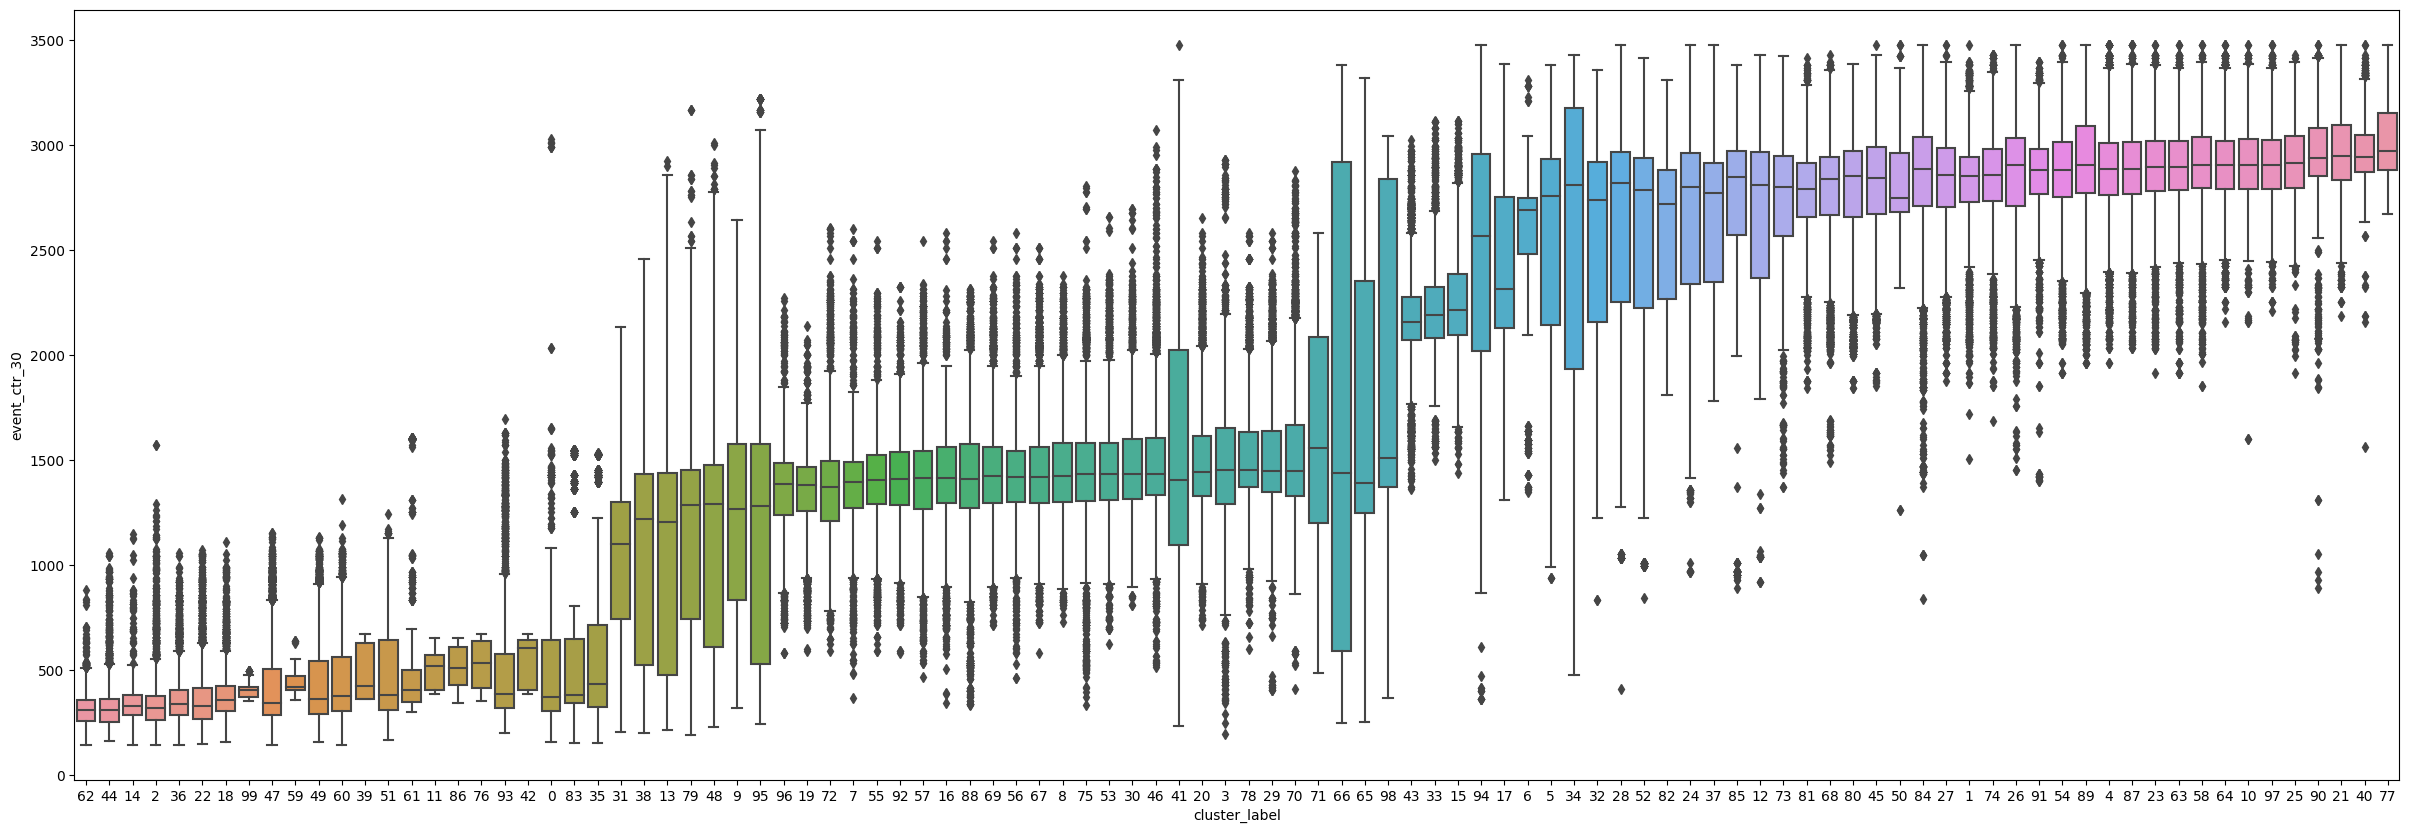

In [55]:
ClusterDisplay('event_ctr_30')

### Level2: event counts admin1 

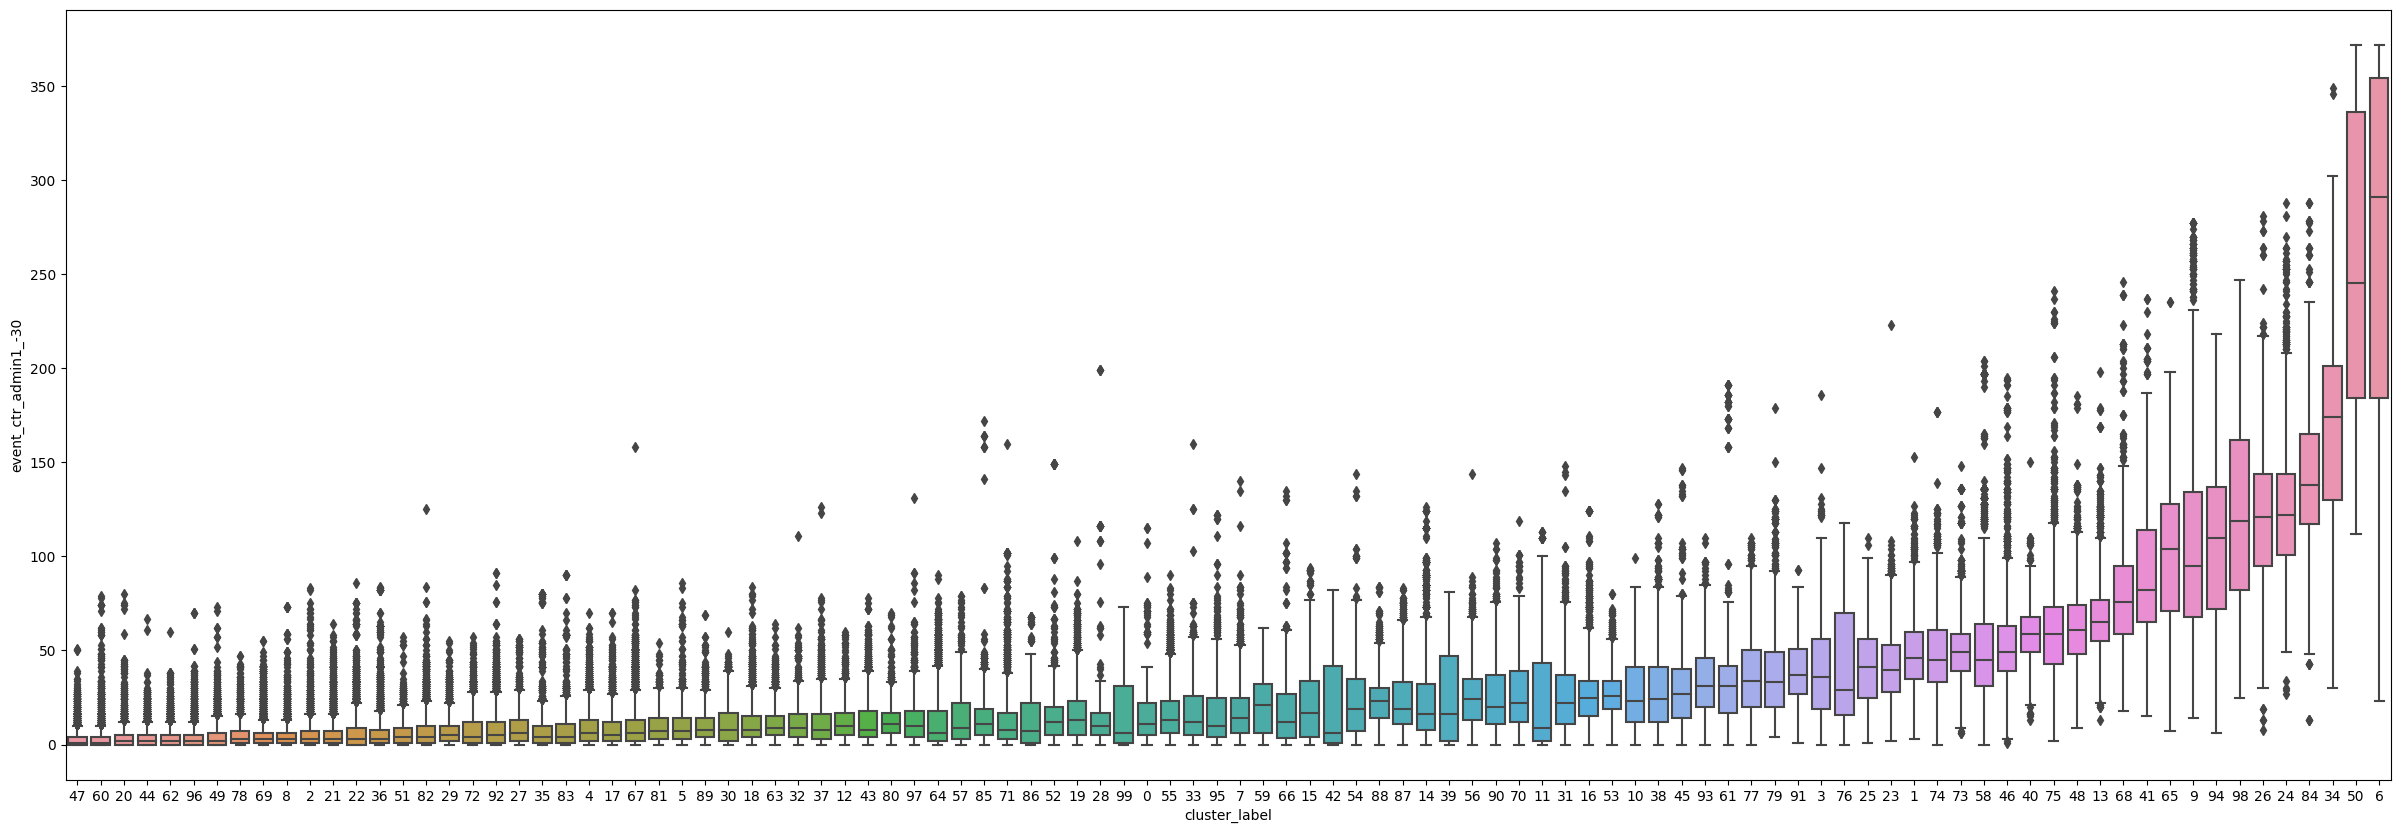

In [56]:
ClusterDisplay('event_ctr_admin1_-30')

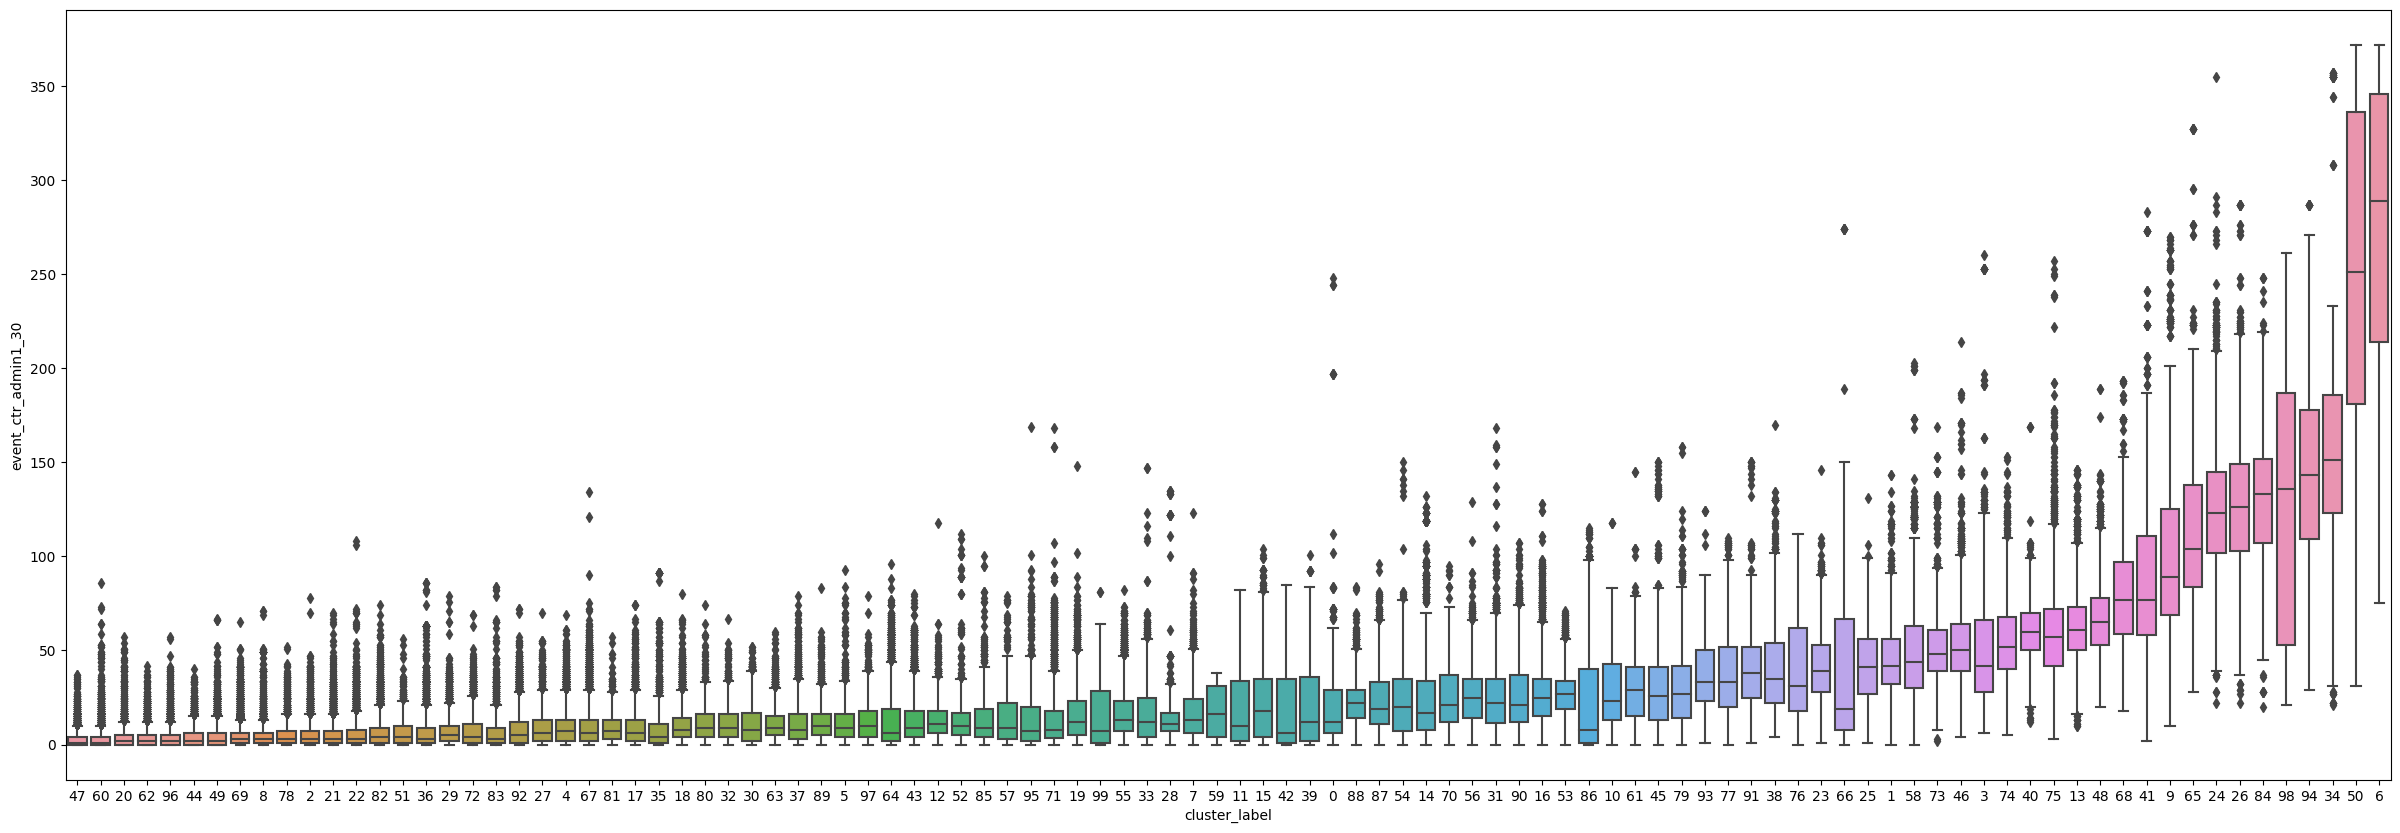

In [57]:
ClusterDisplay('event_ctr_admin1_30')

### Level3: event counts admin2

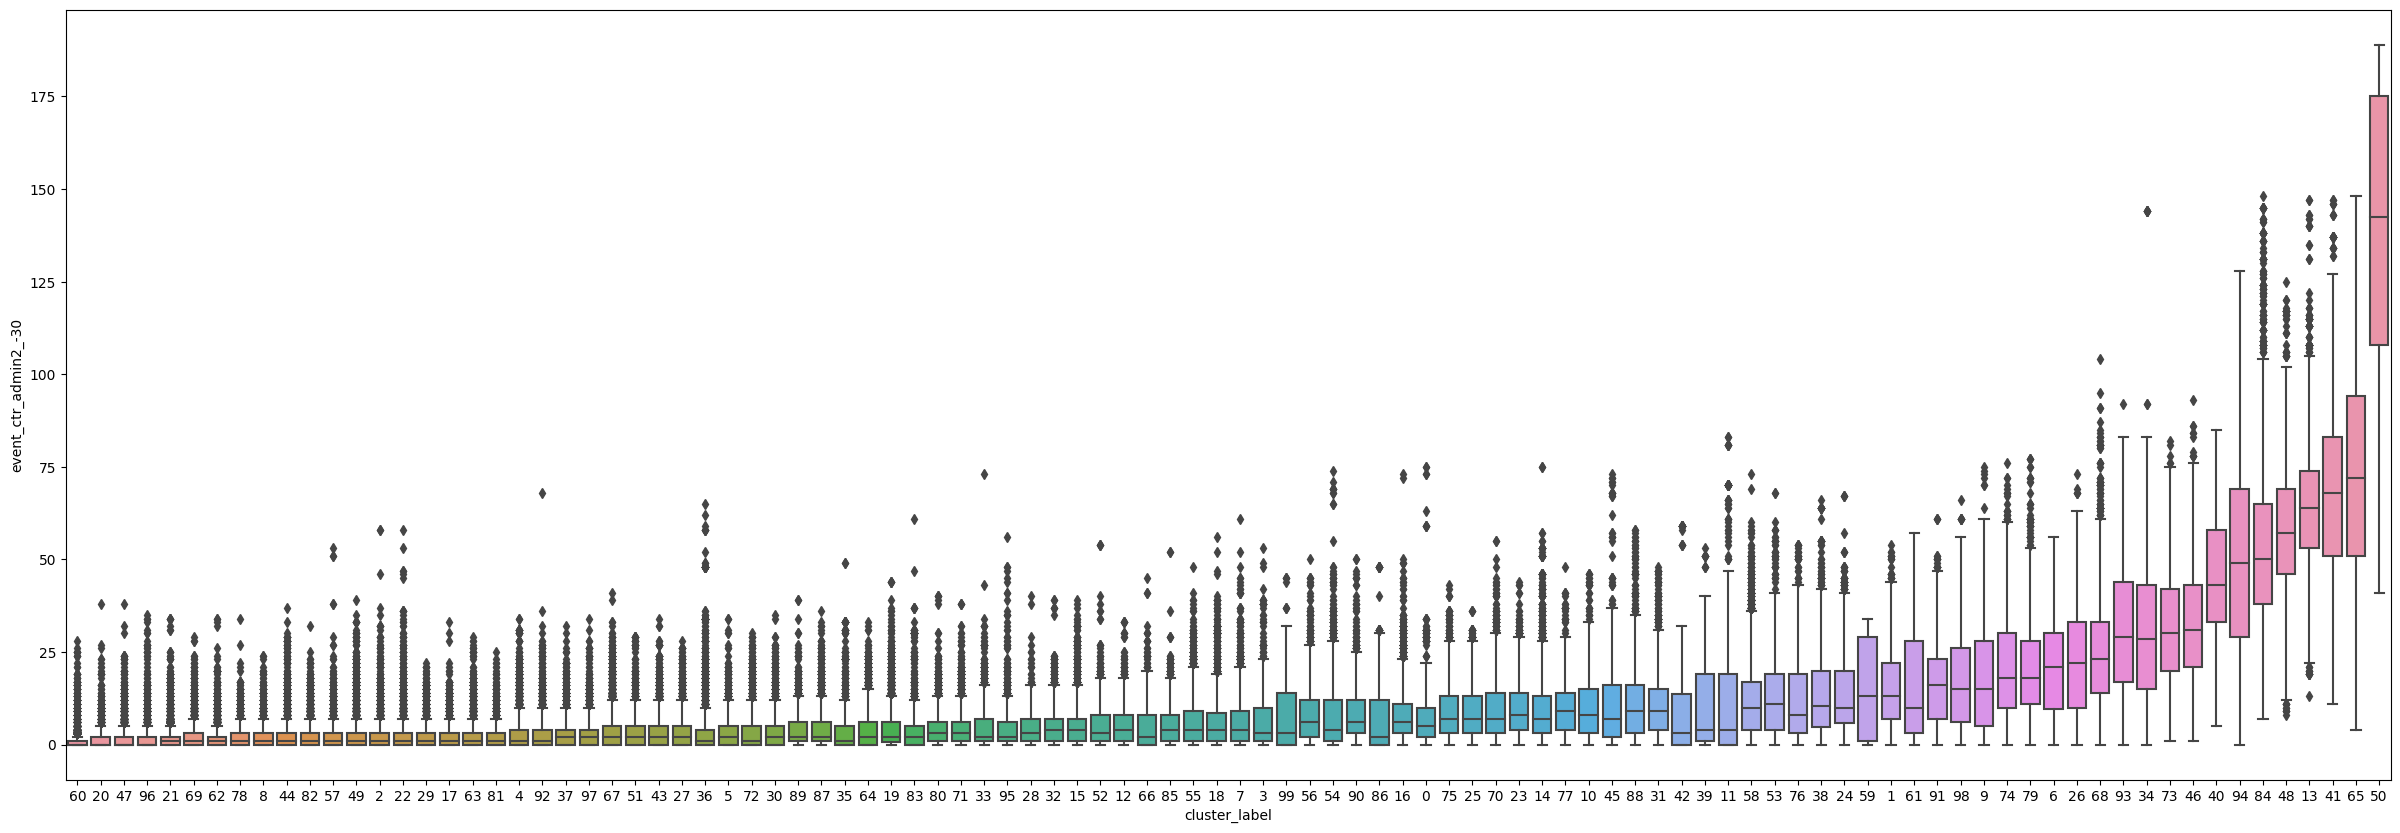

In [58]:
ClusterDisplay('event_ctr_admin2_-30')

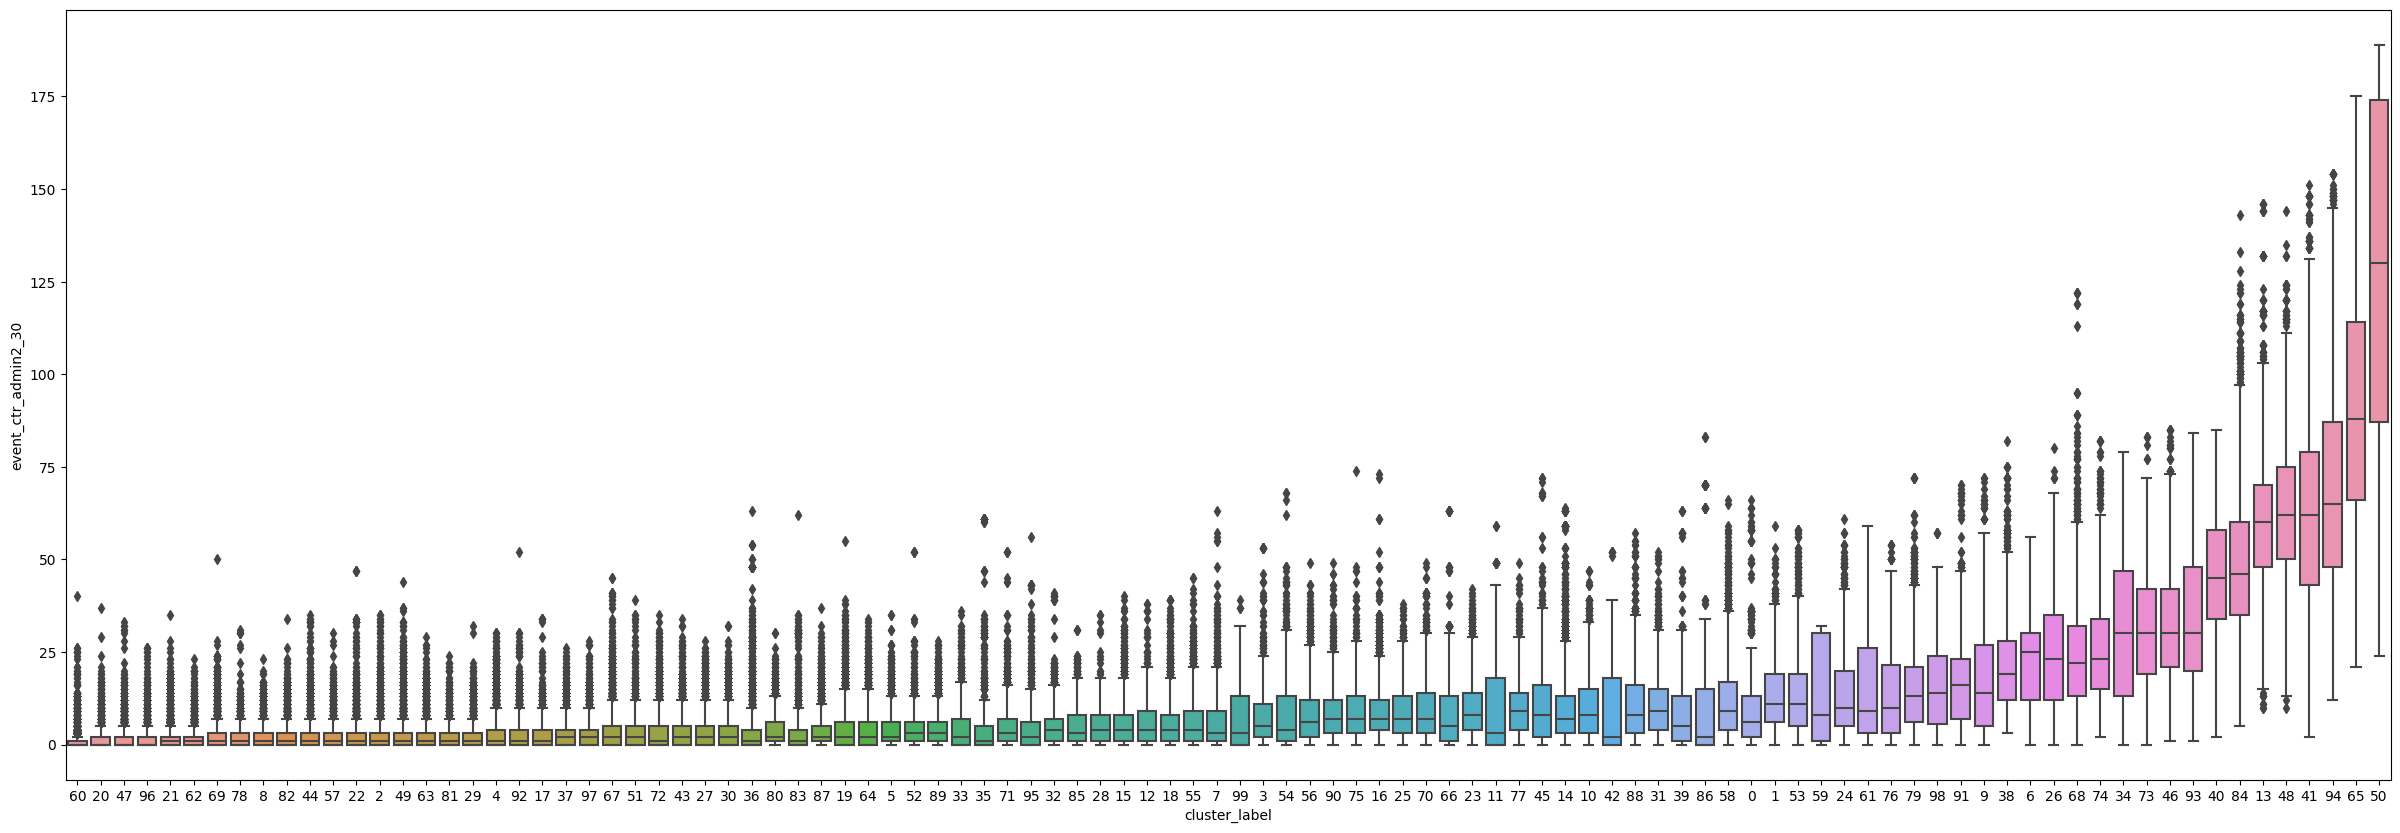

In [59]:
ClusterDisplay('event_ctr_admin2_30')

### Level4: actor1

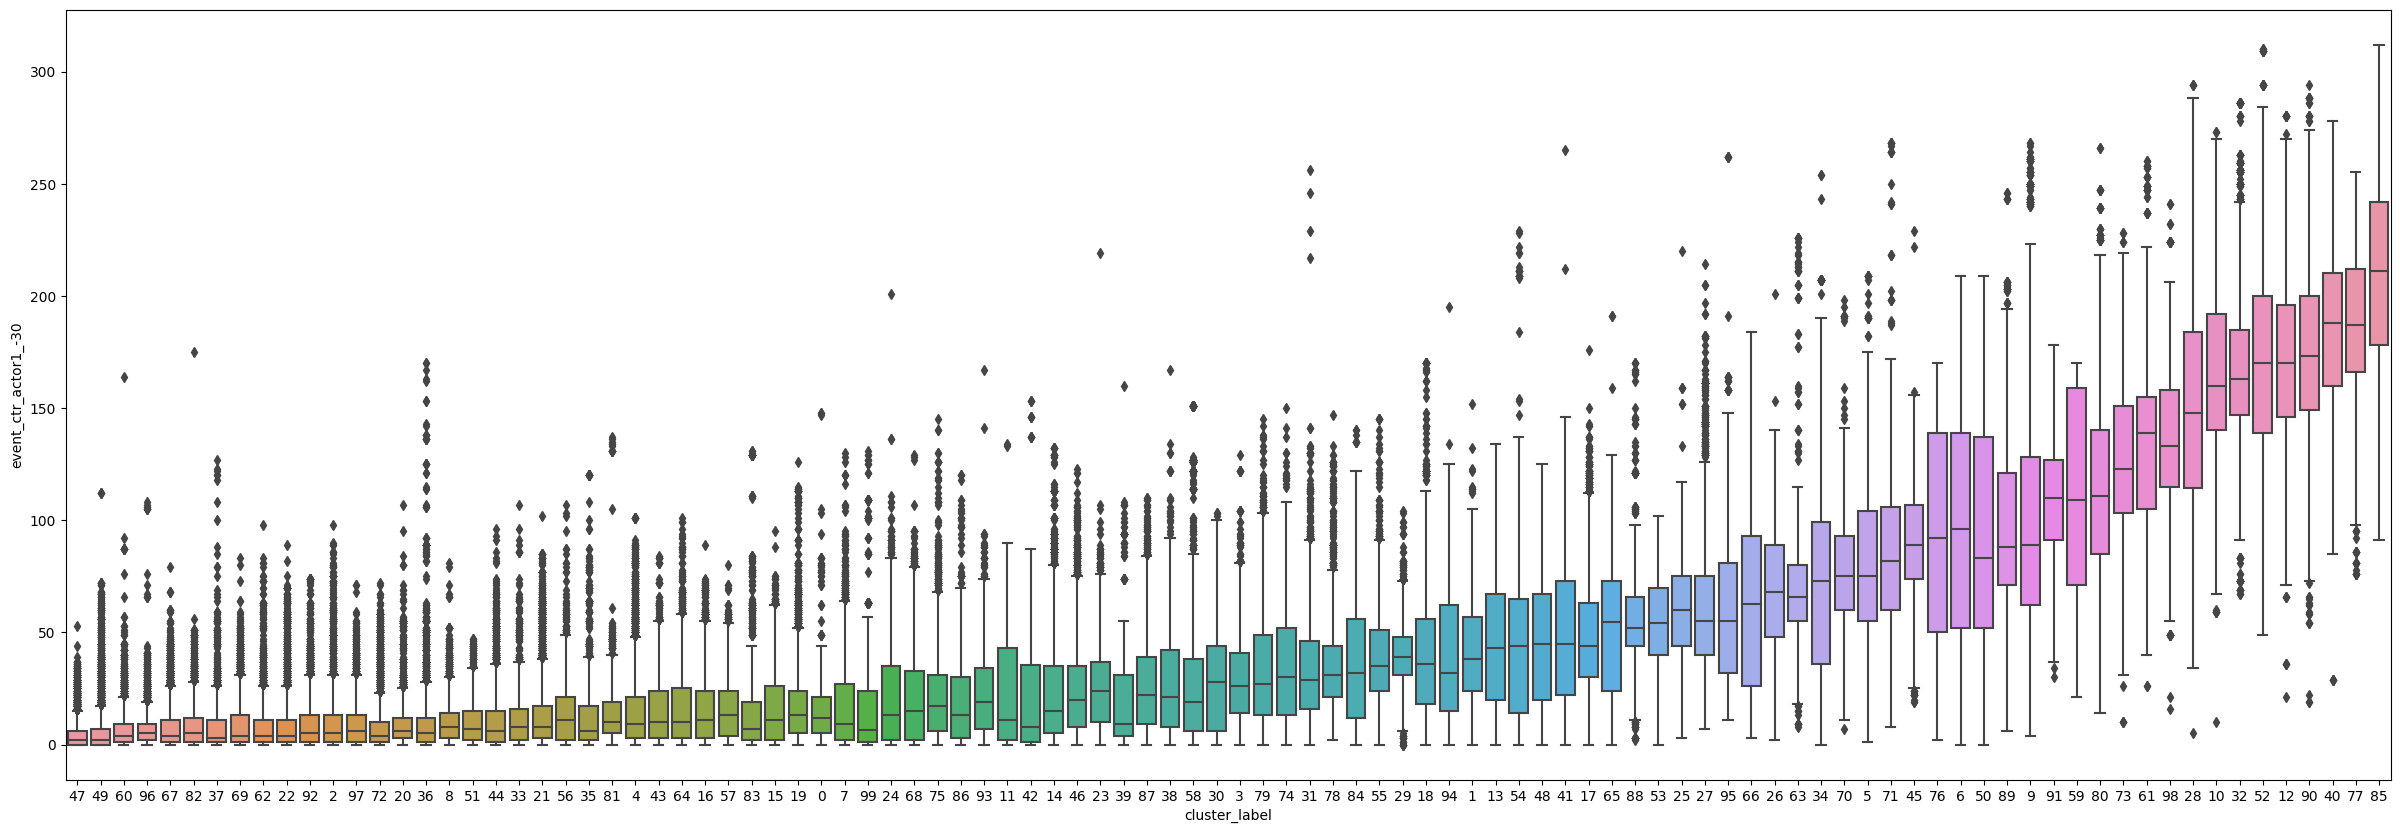

In [60]:
ClusterDisplay('event_ctr_actor1_-30')

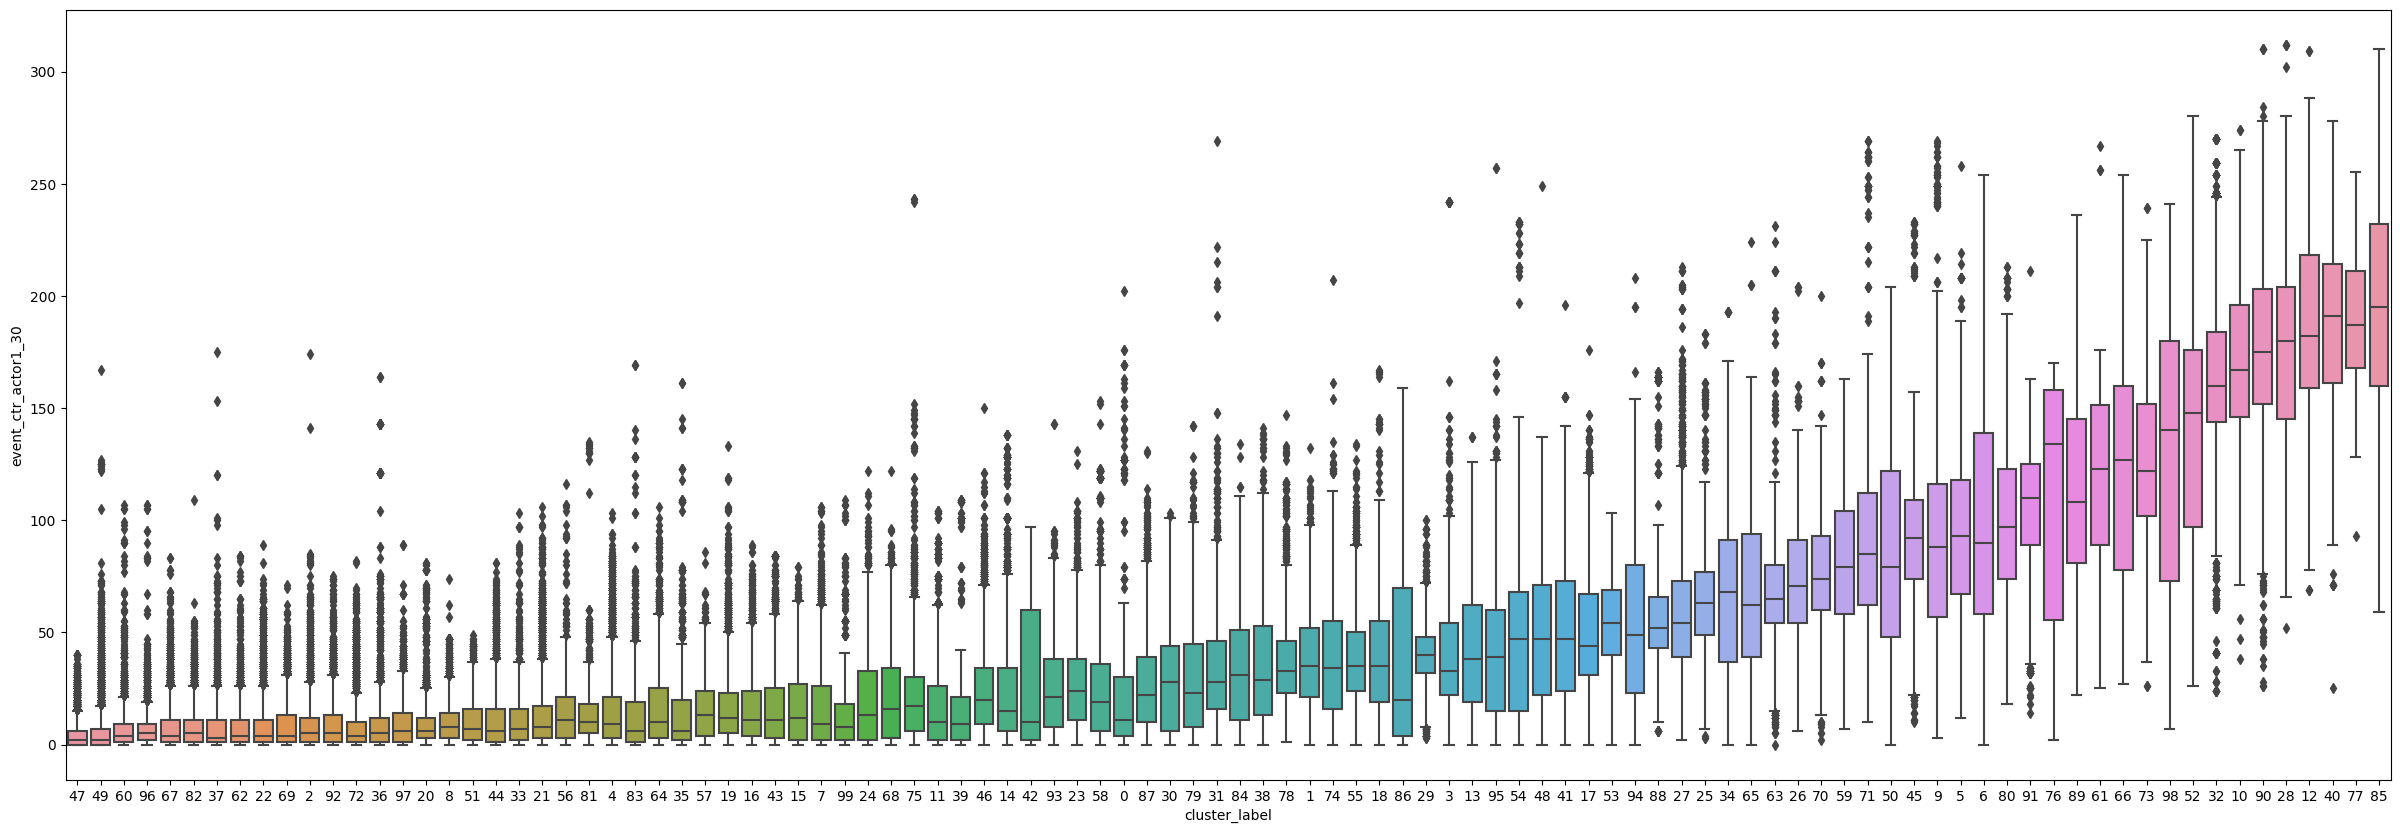

In [61]:
ClusterDisplay('event_ctr_actor1_30')

### Level5: actor1 & interaction

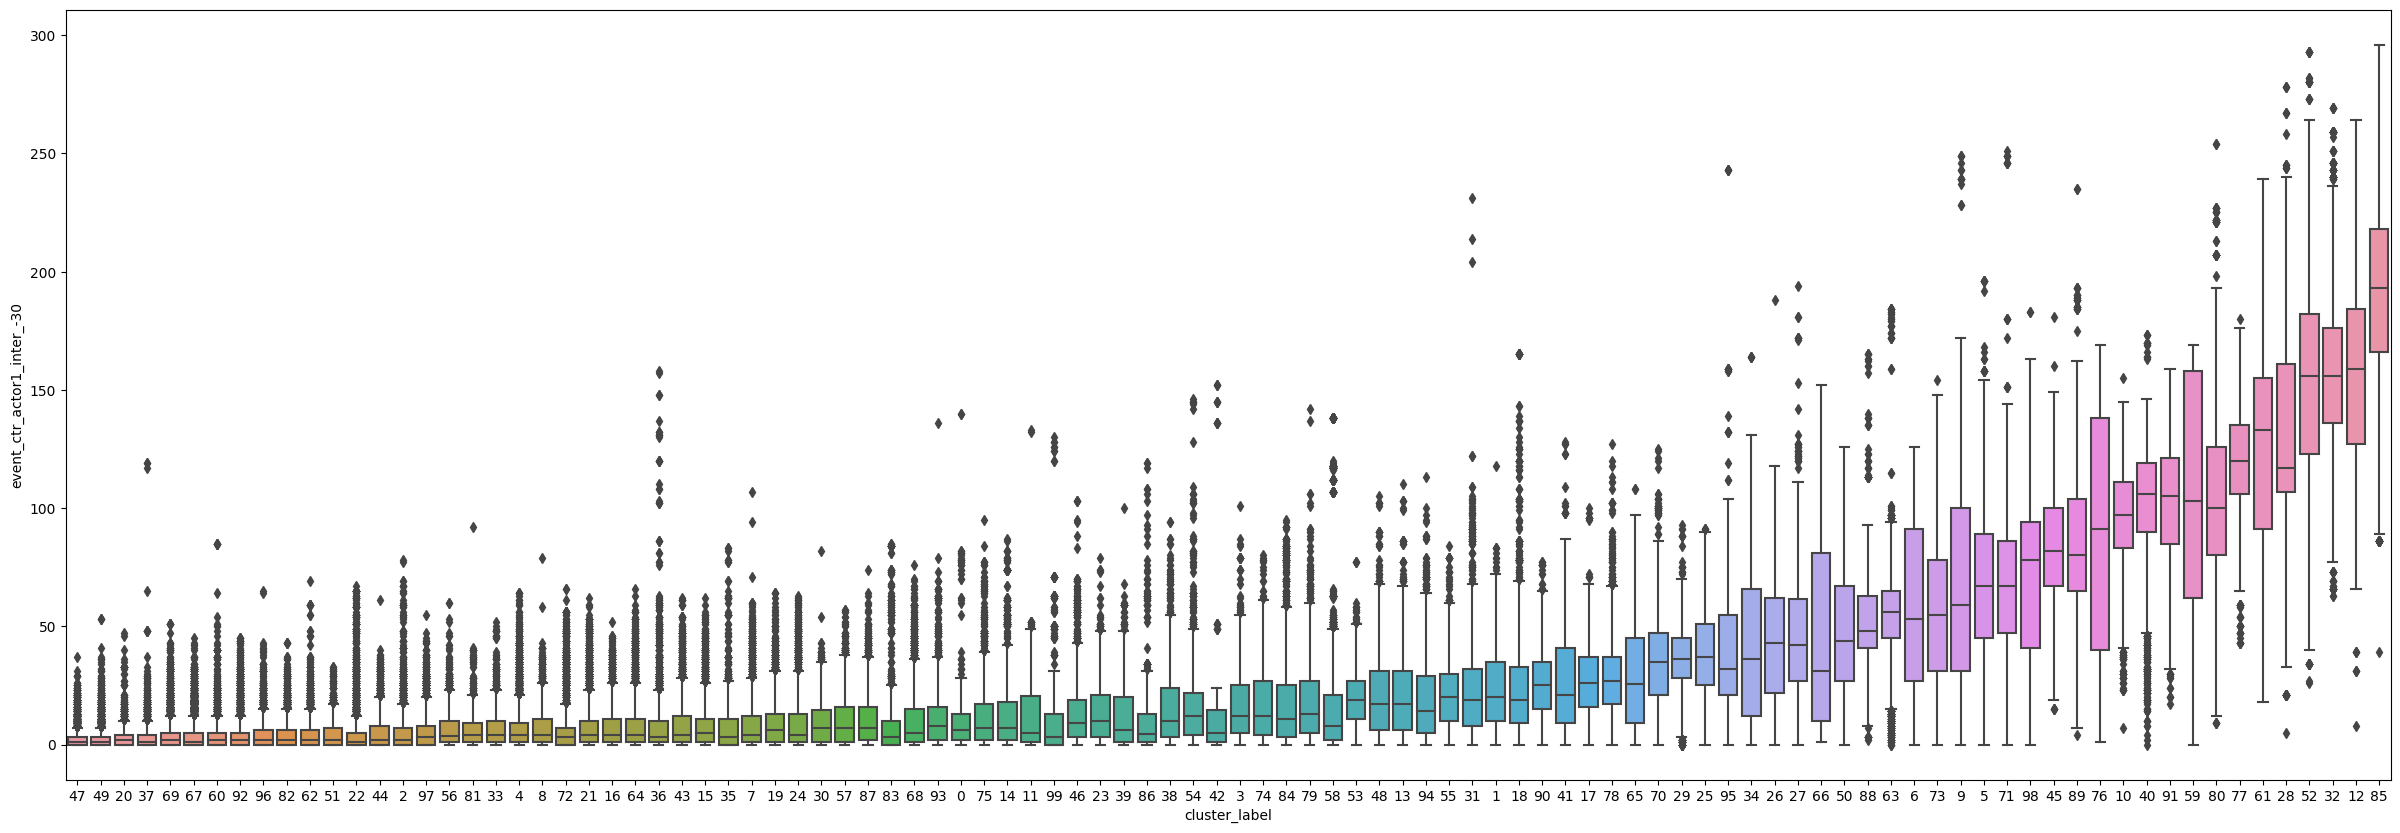

In [62]:
ClusterDisplay('event_ctr_actor1_inter_-30')

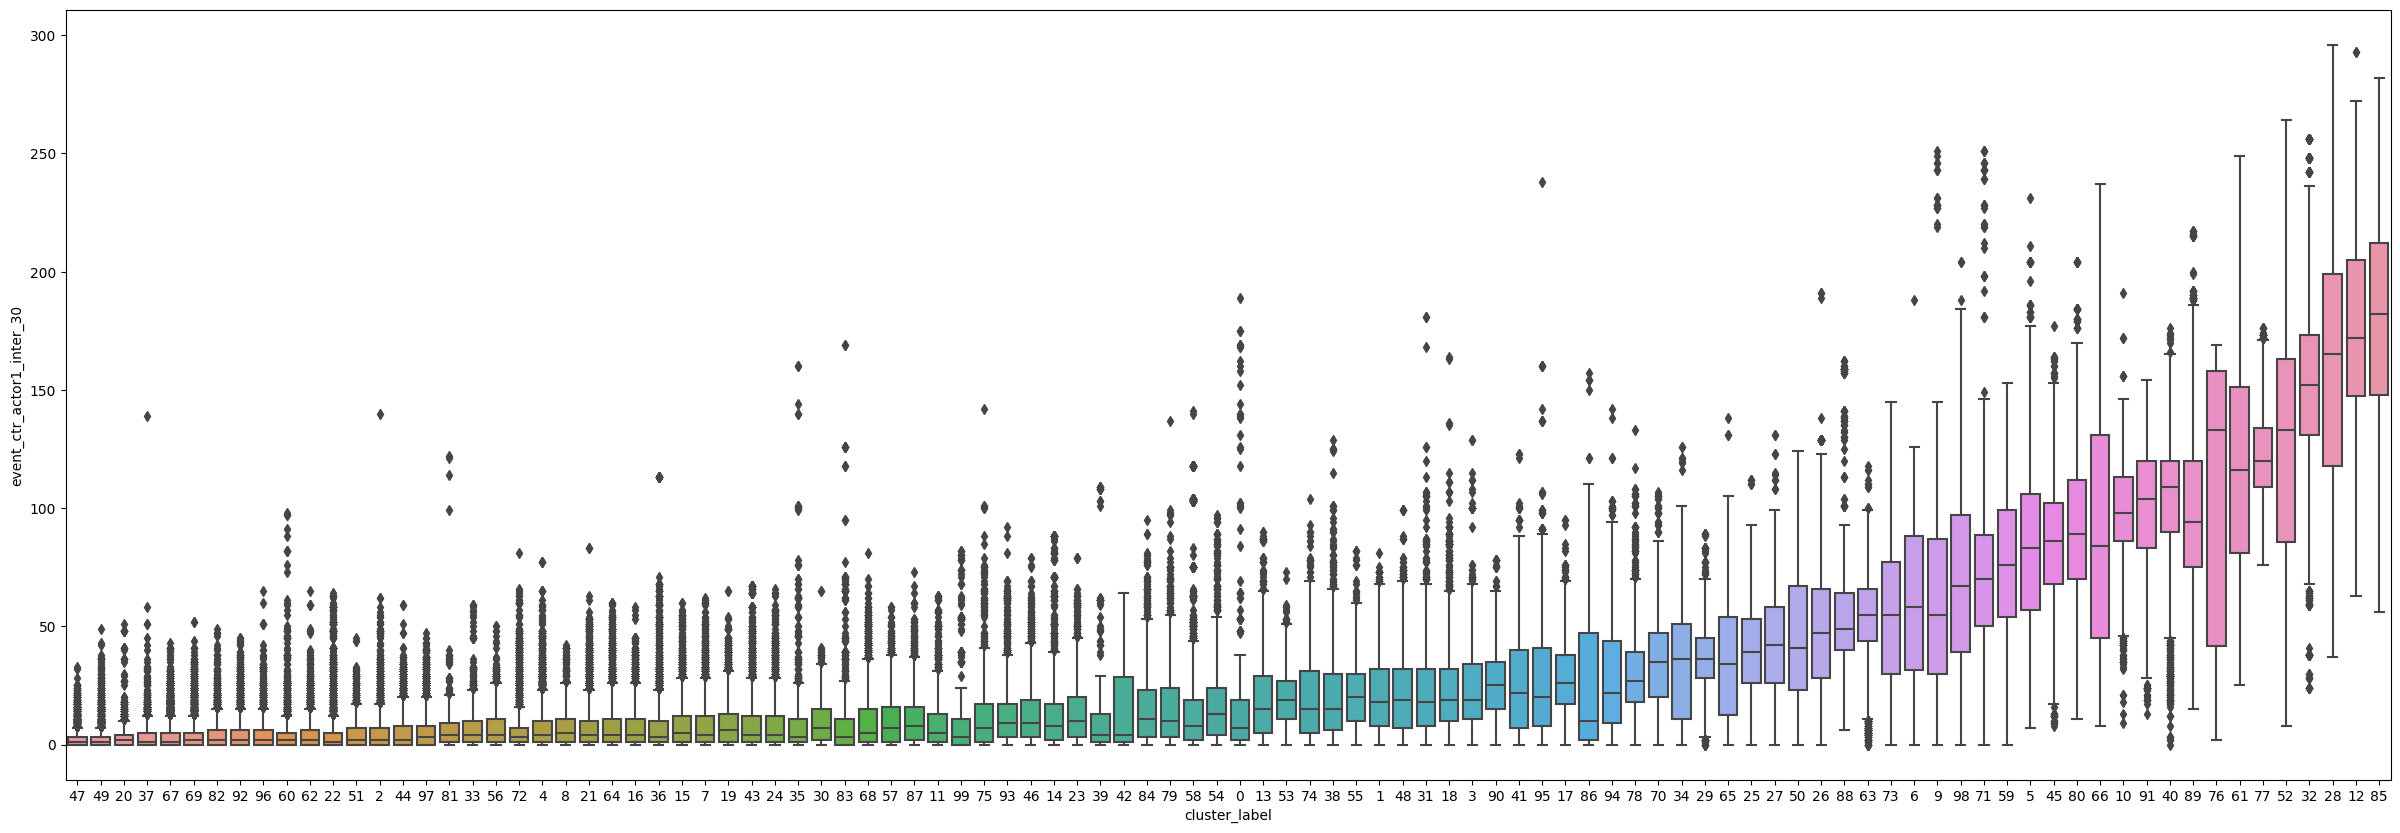

In [63]:
ClusterDisplay('event_ctr_actor1_inter_30')

### Level6: fatality sum 

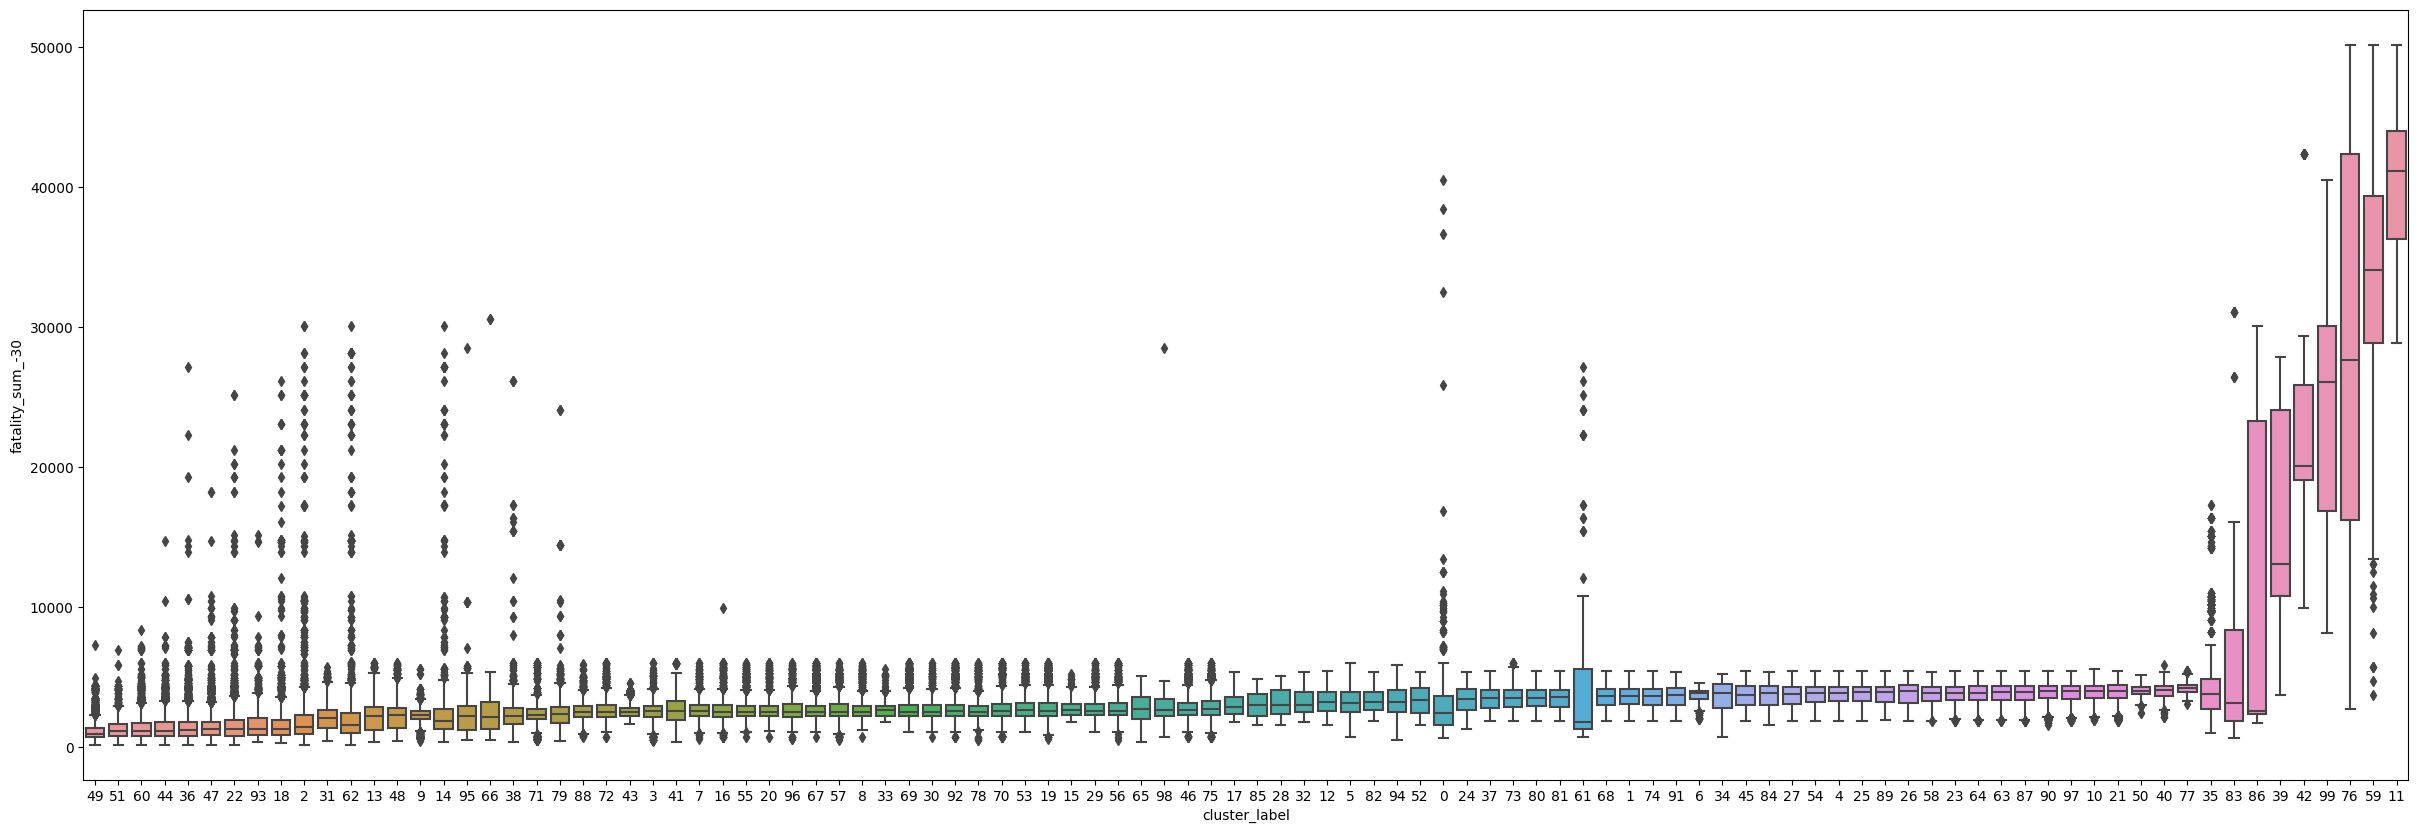

In [64]:
ClusterDisplay('fatality_sum_-30')

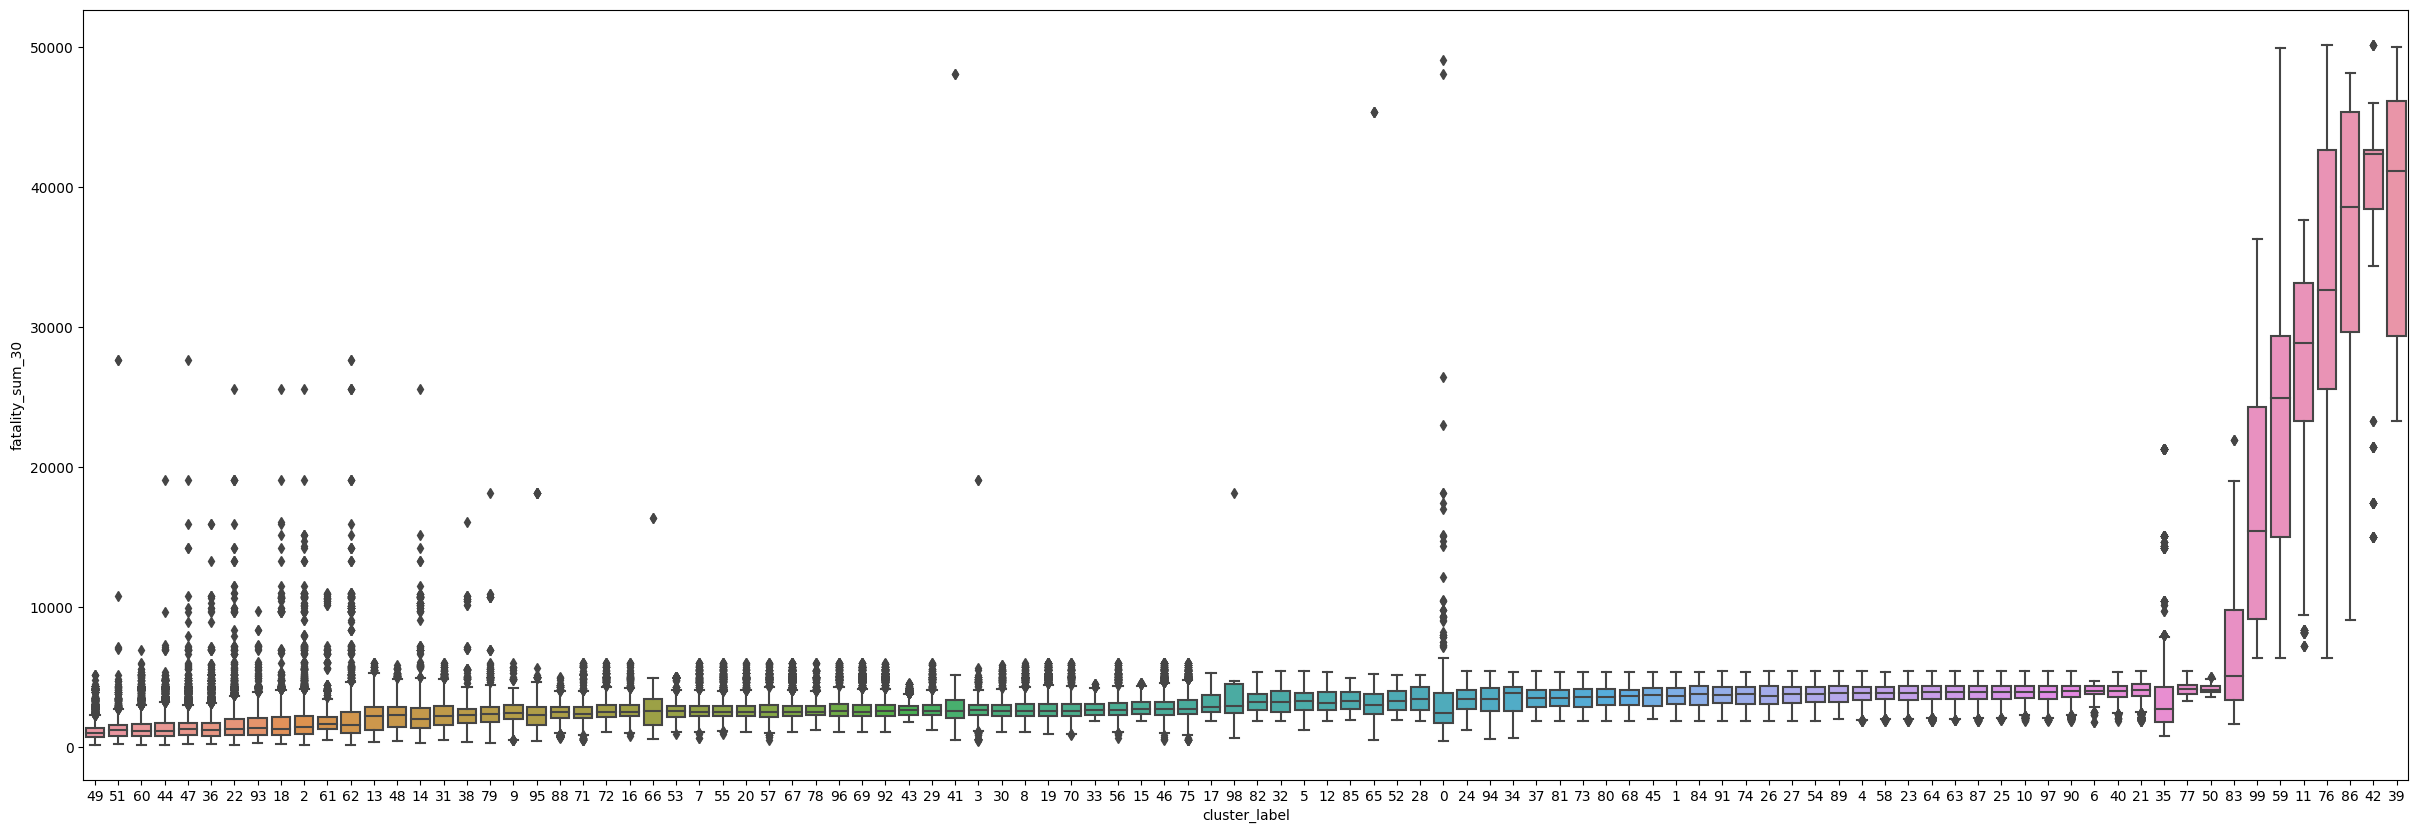

In [65]:
ClusterDisplay('fatality_sum_30')

### Level7: fatality sum admin1

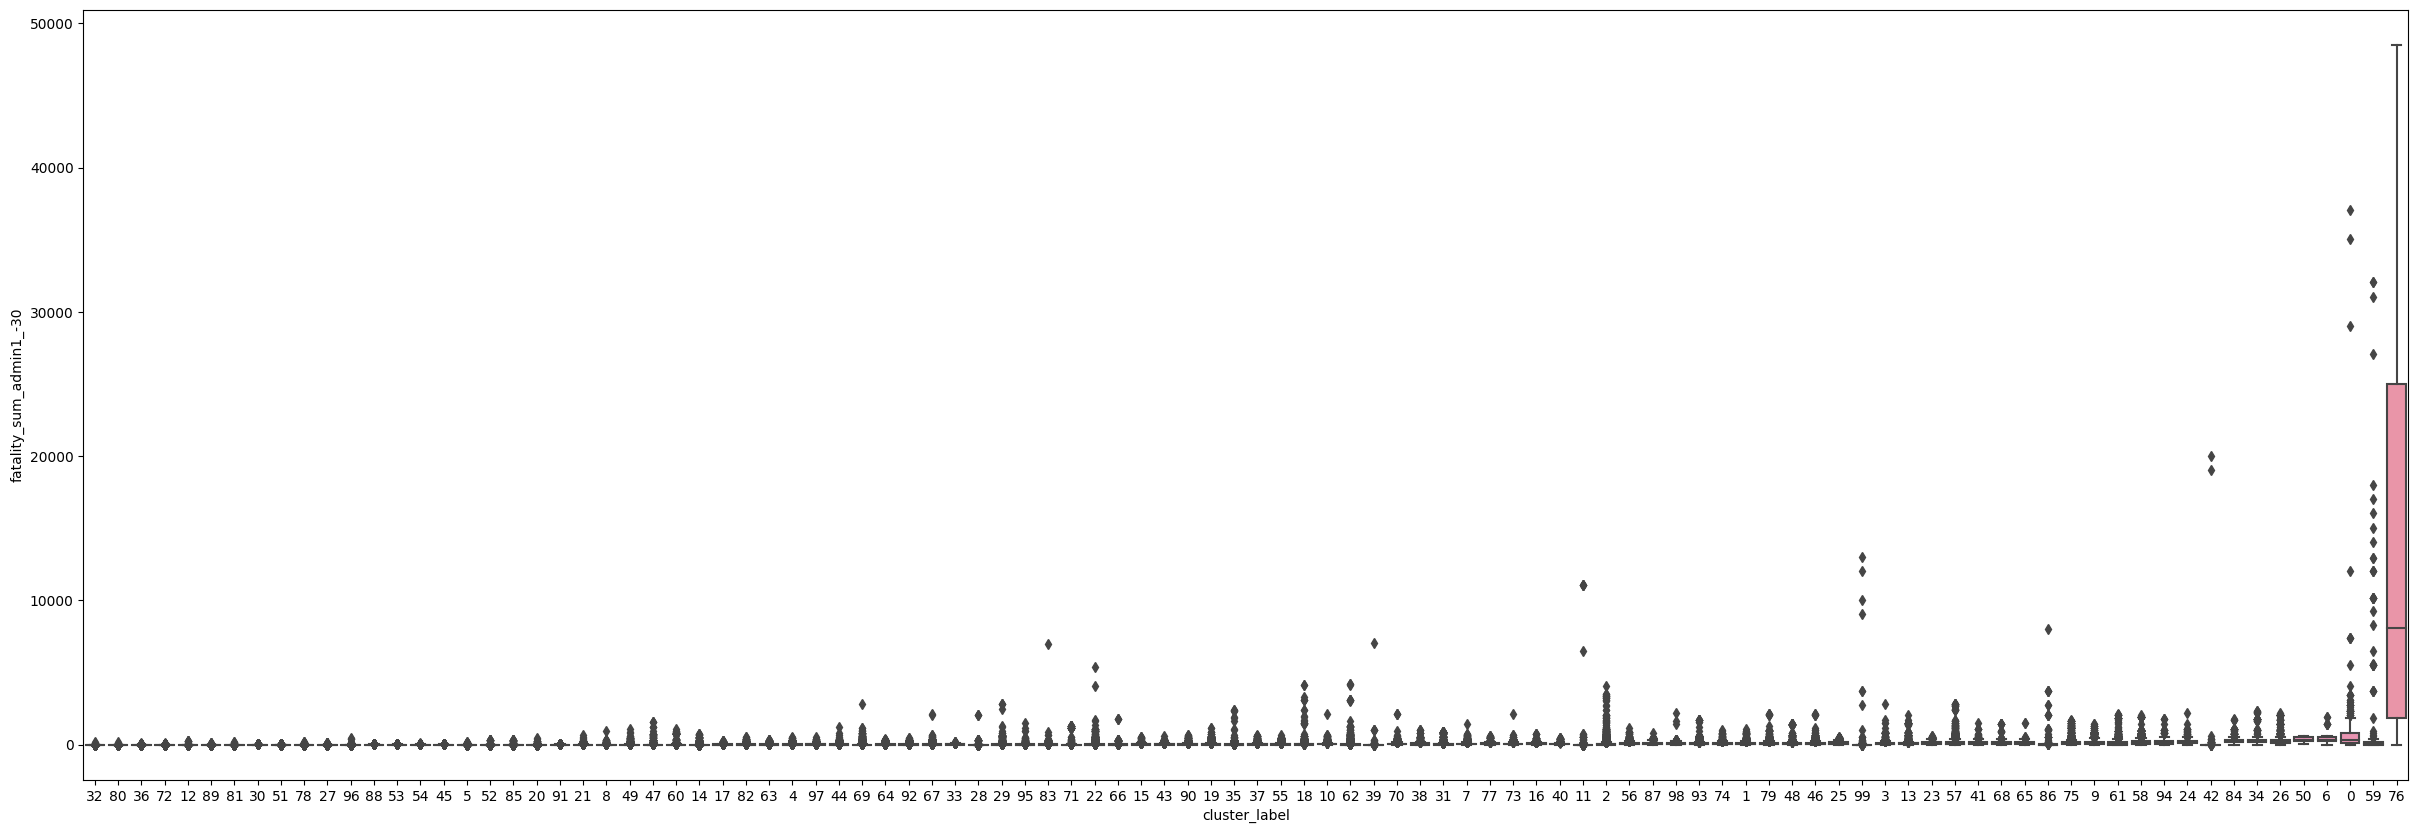

In [66]:
ClusterDisplay('fatality_sum_admin1_-30')

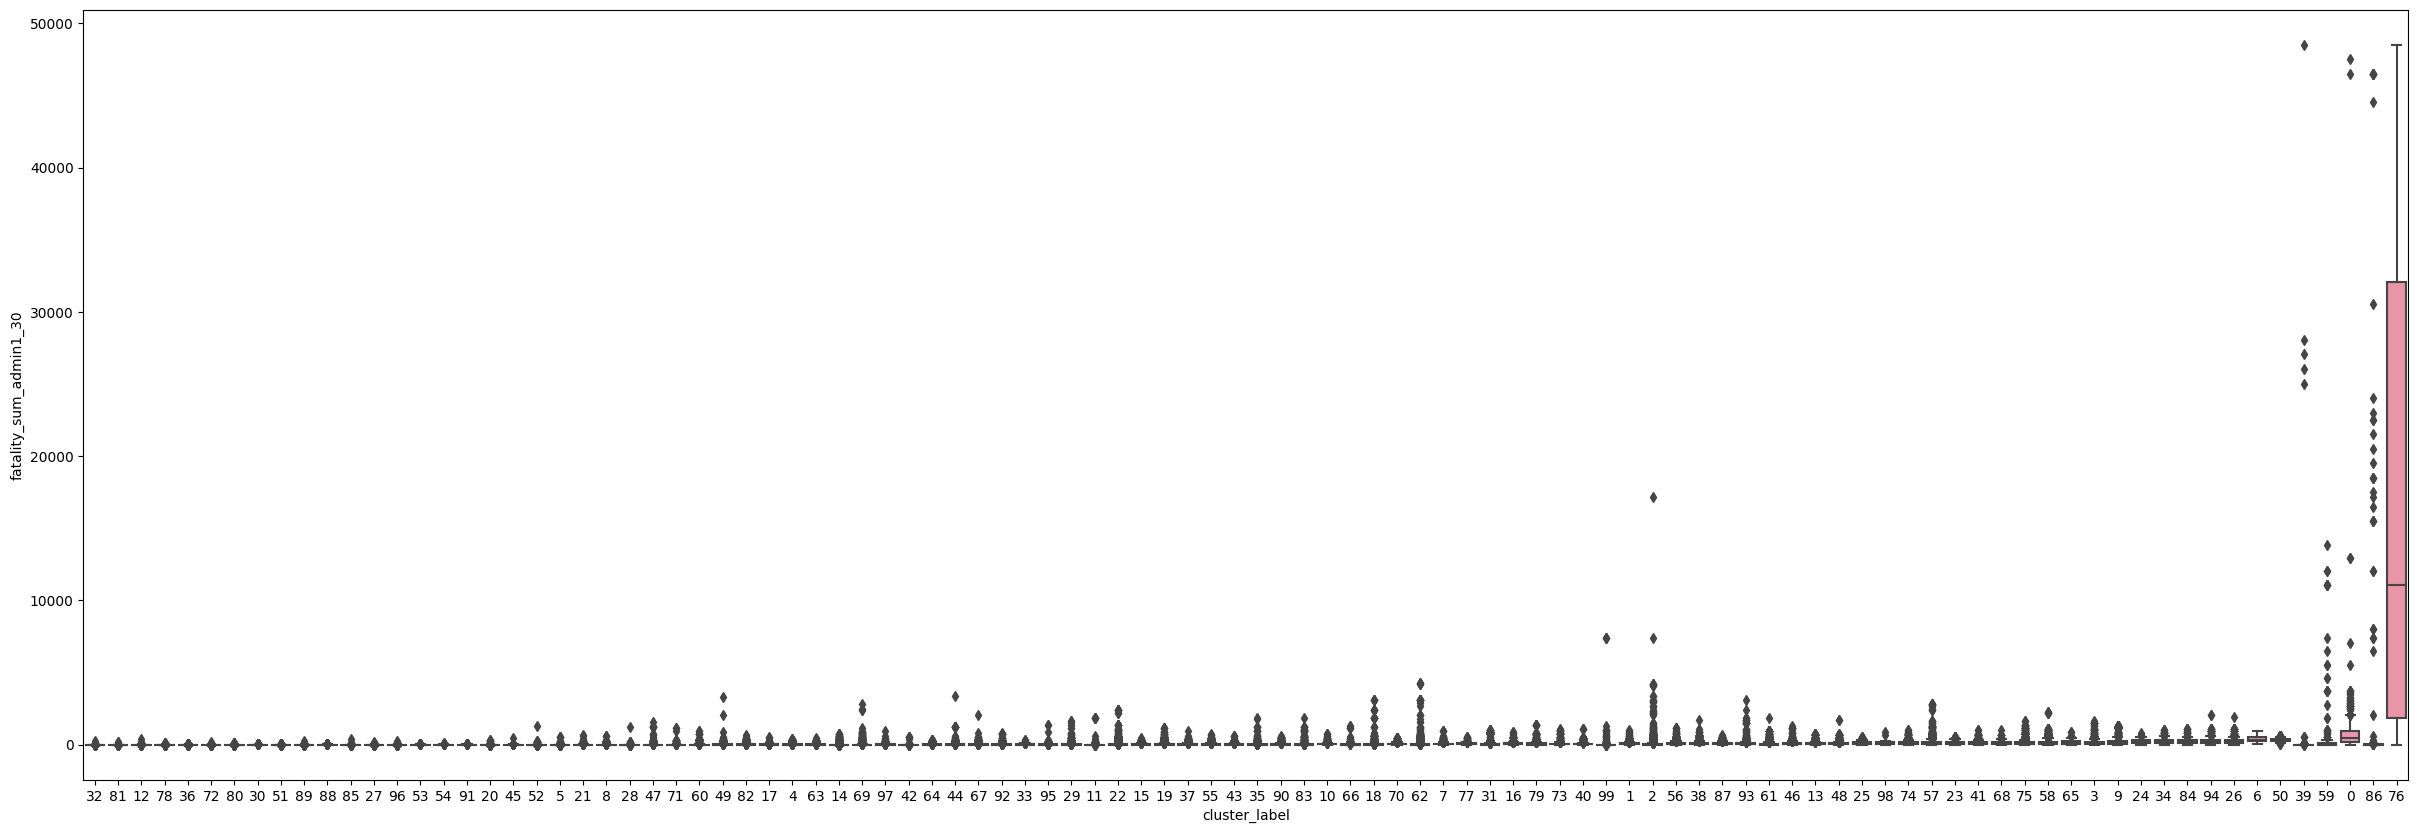

In [70]:
ClusterDisplay('fatality_sum_admin1_30')

### Level8: fatality sum admin2

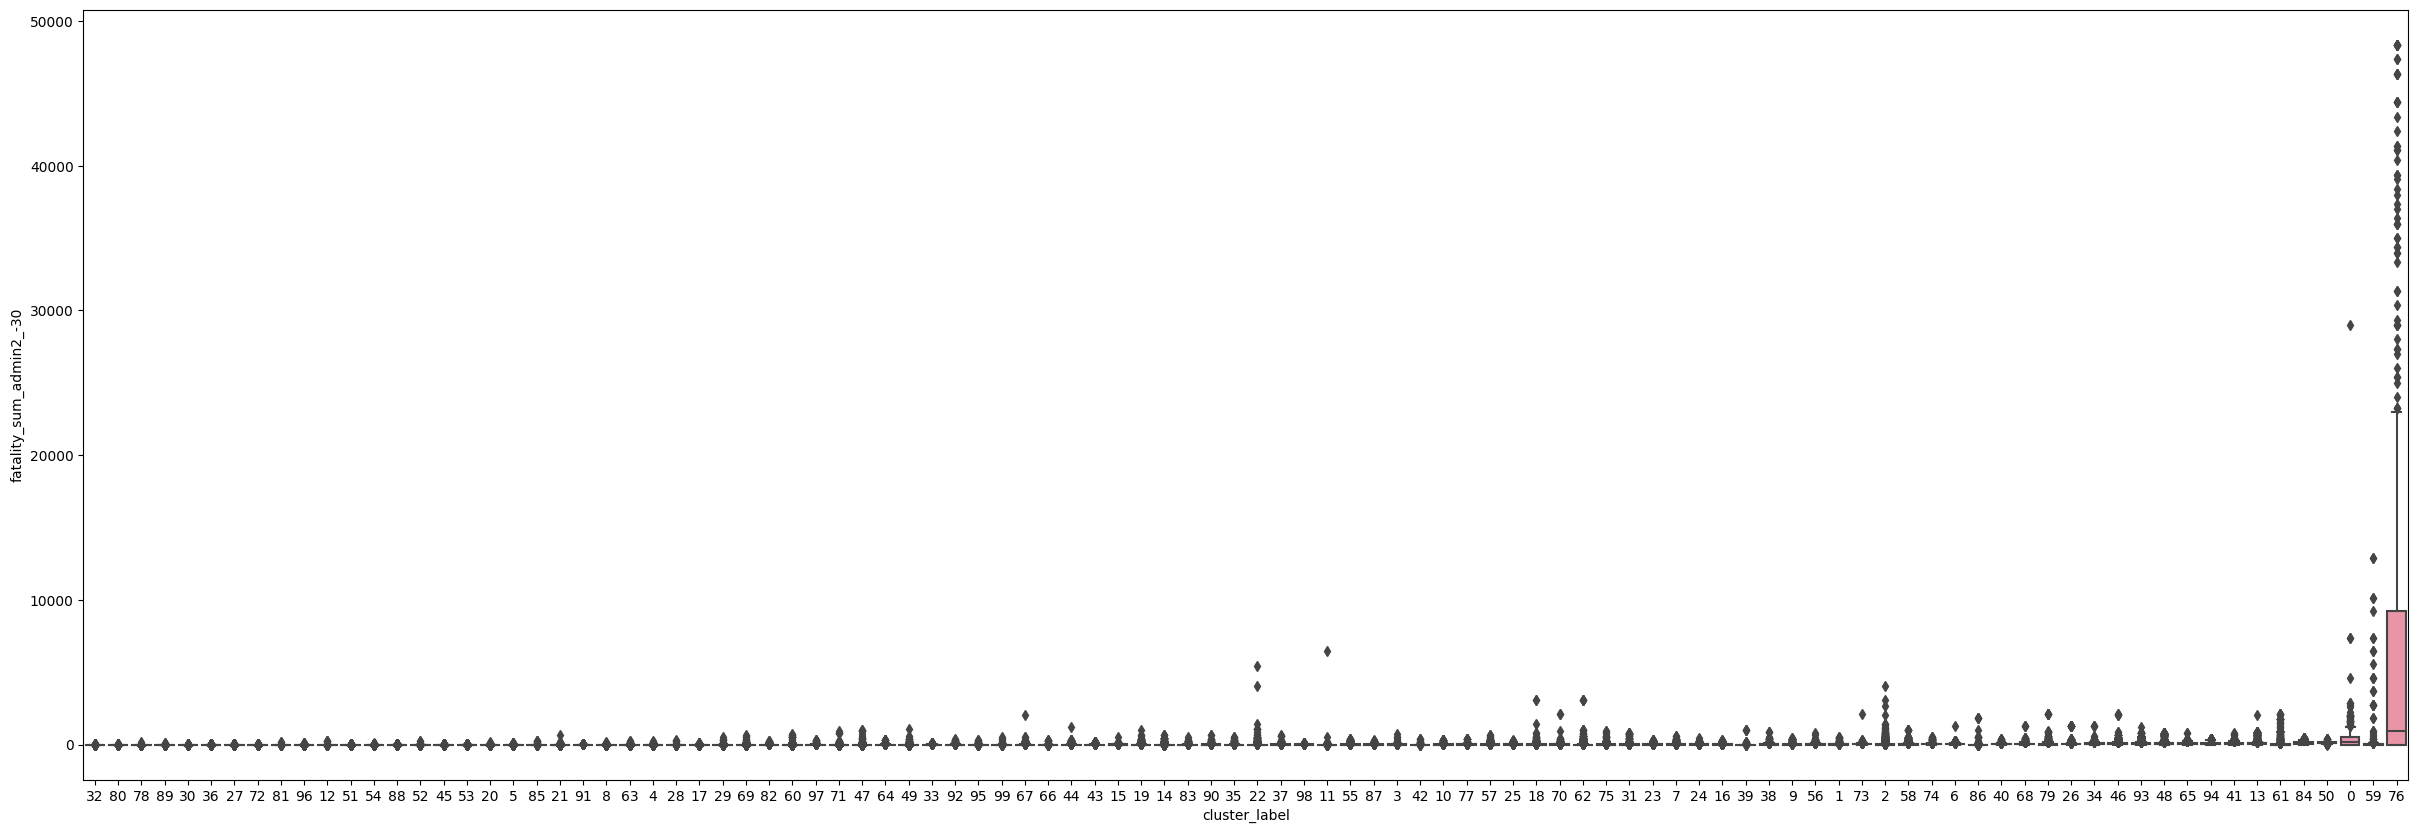

In [68]:
ClusterDisplay('fatality_sum_admin2_-30')

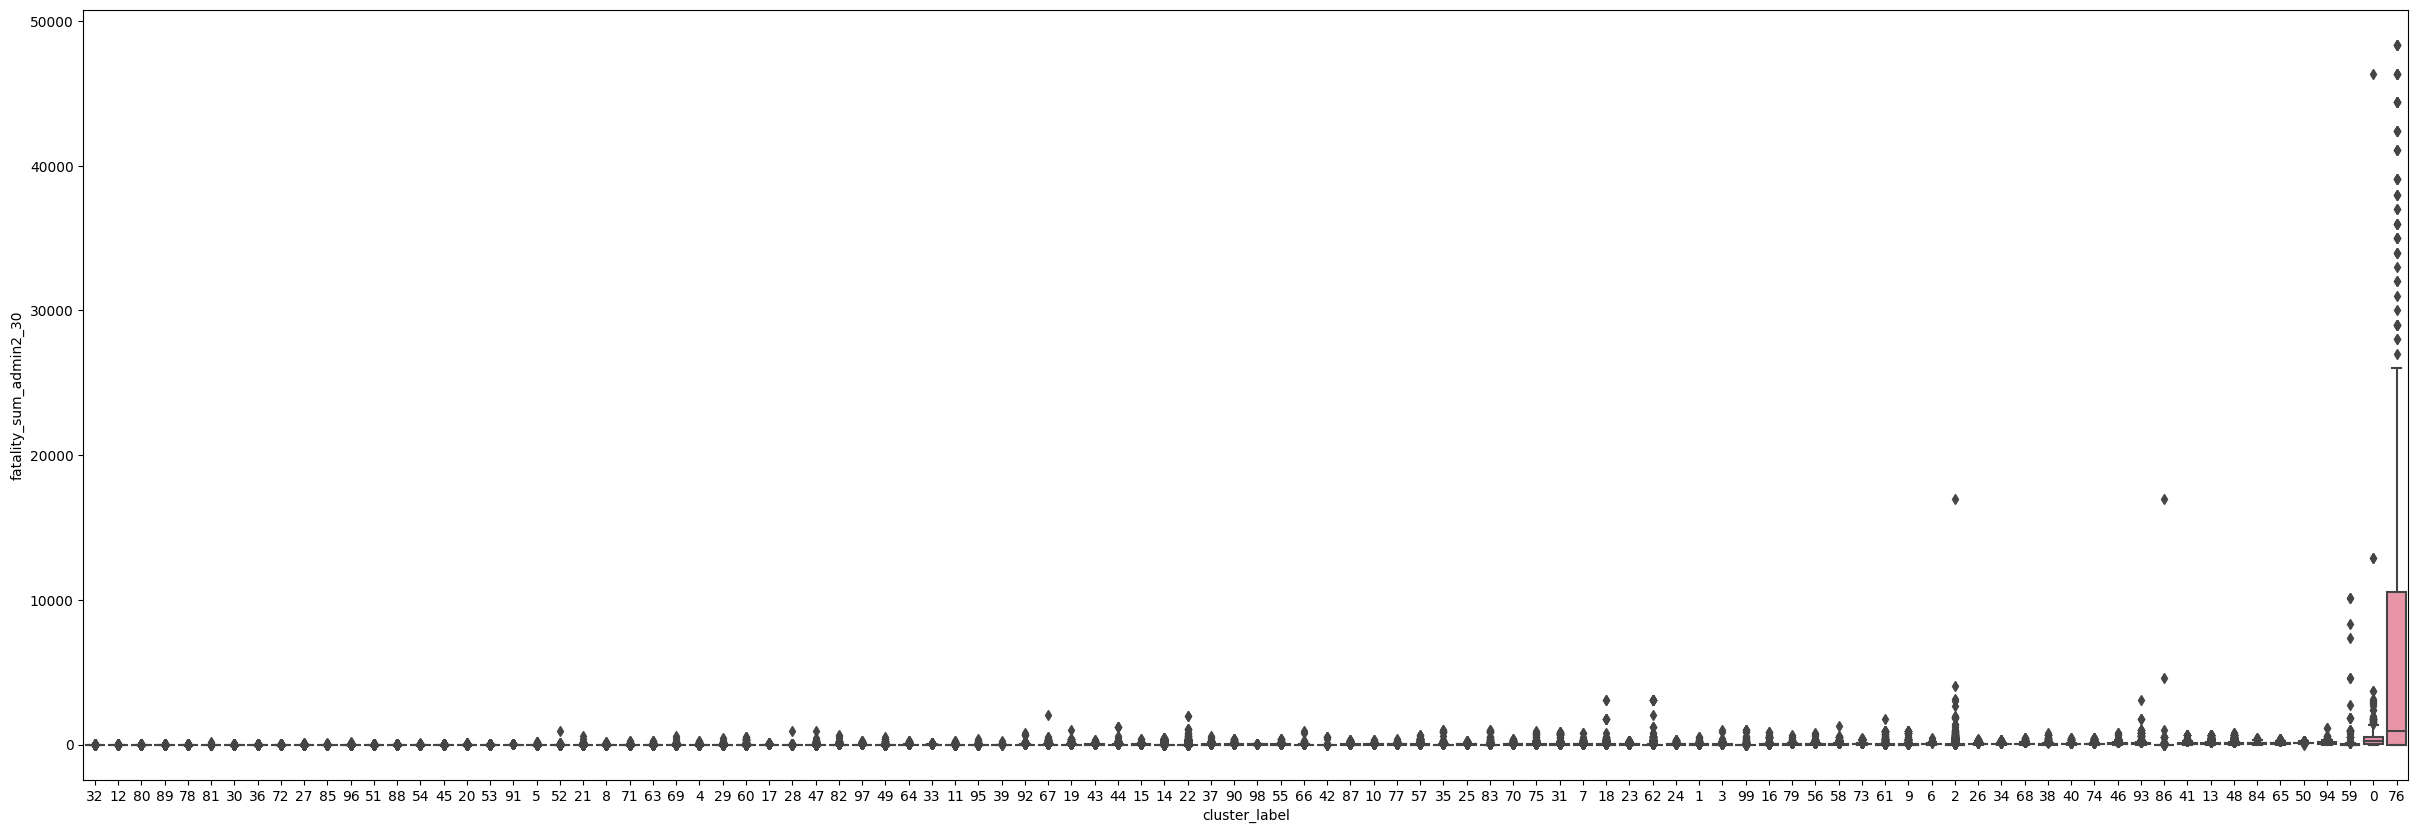

In [69]:
ClusterDisplay('fatality_sum_admin2_30')

### Level9: fatality sum actor1

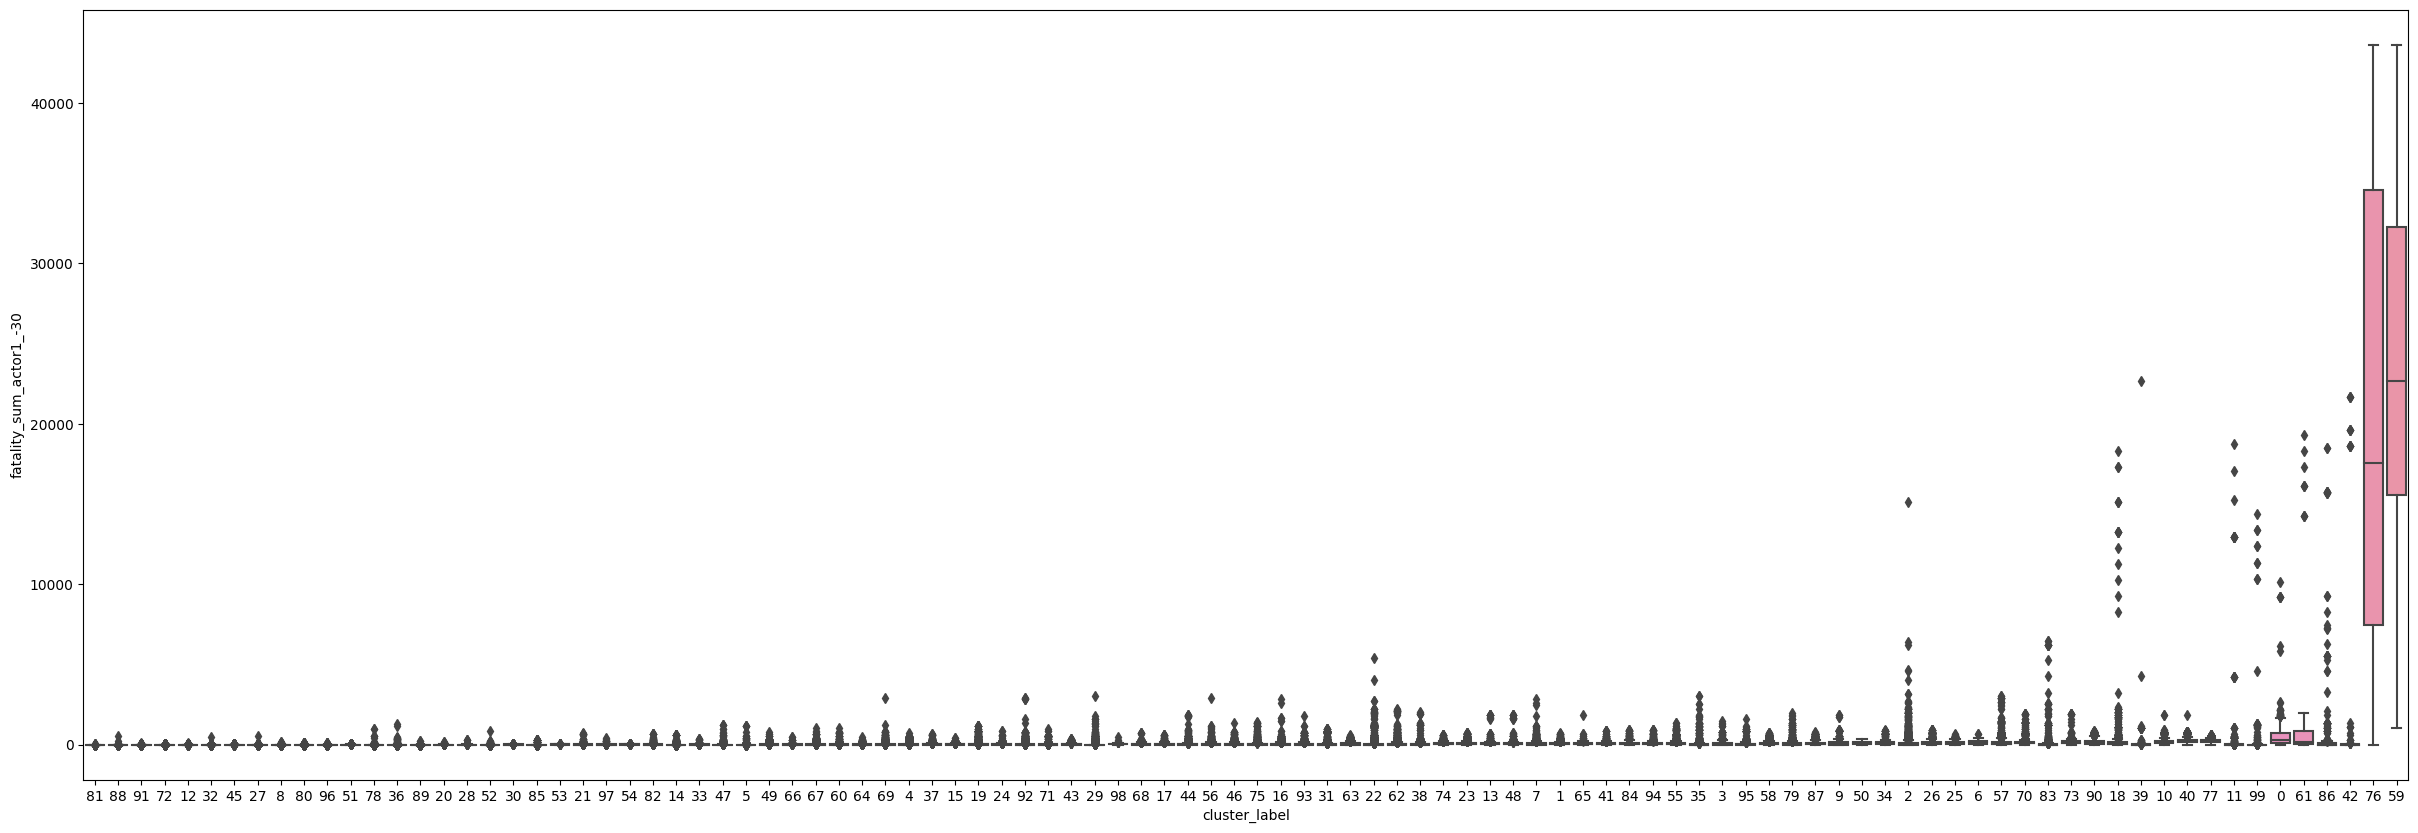

In [72]:
ClusterDisplay('fatality_sum_actor1_-30')

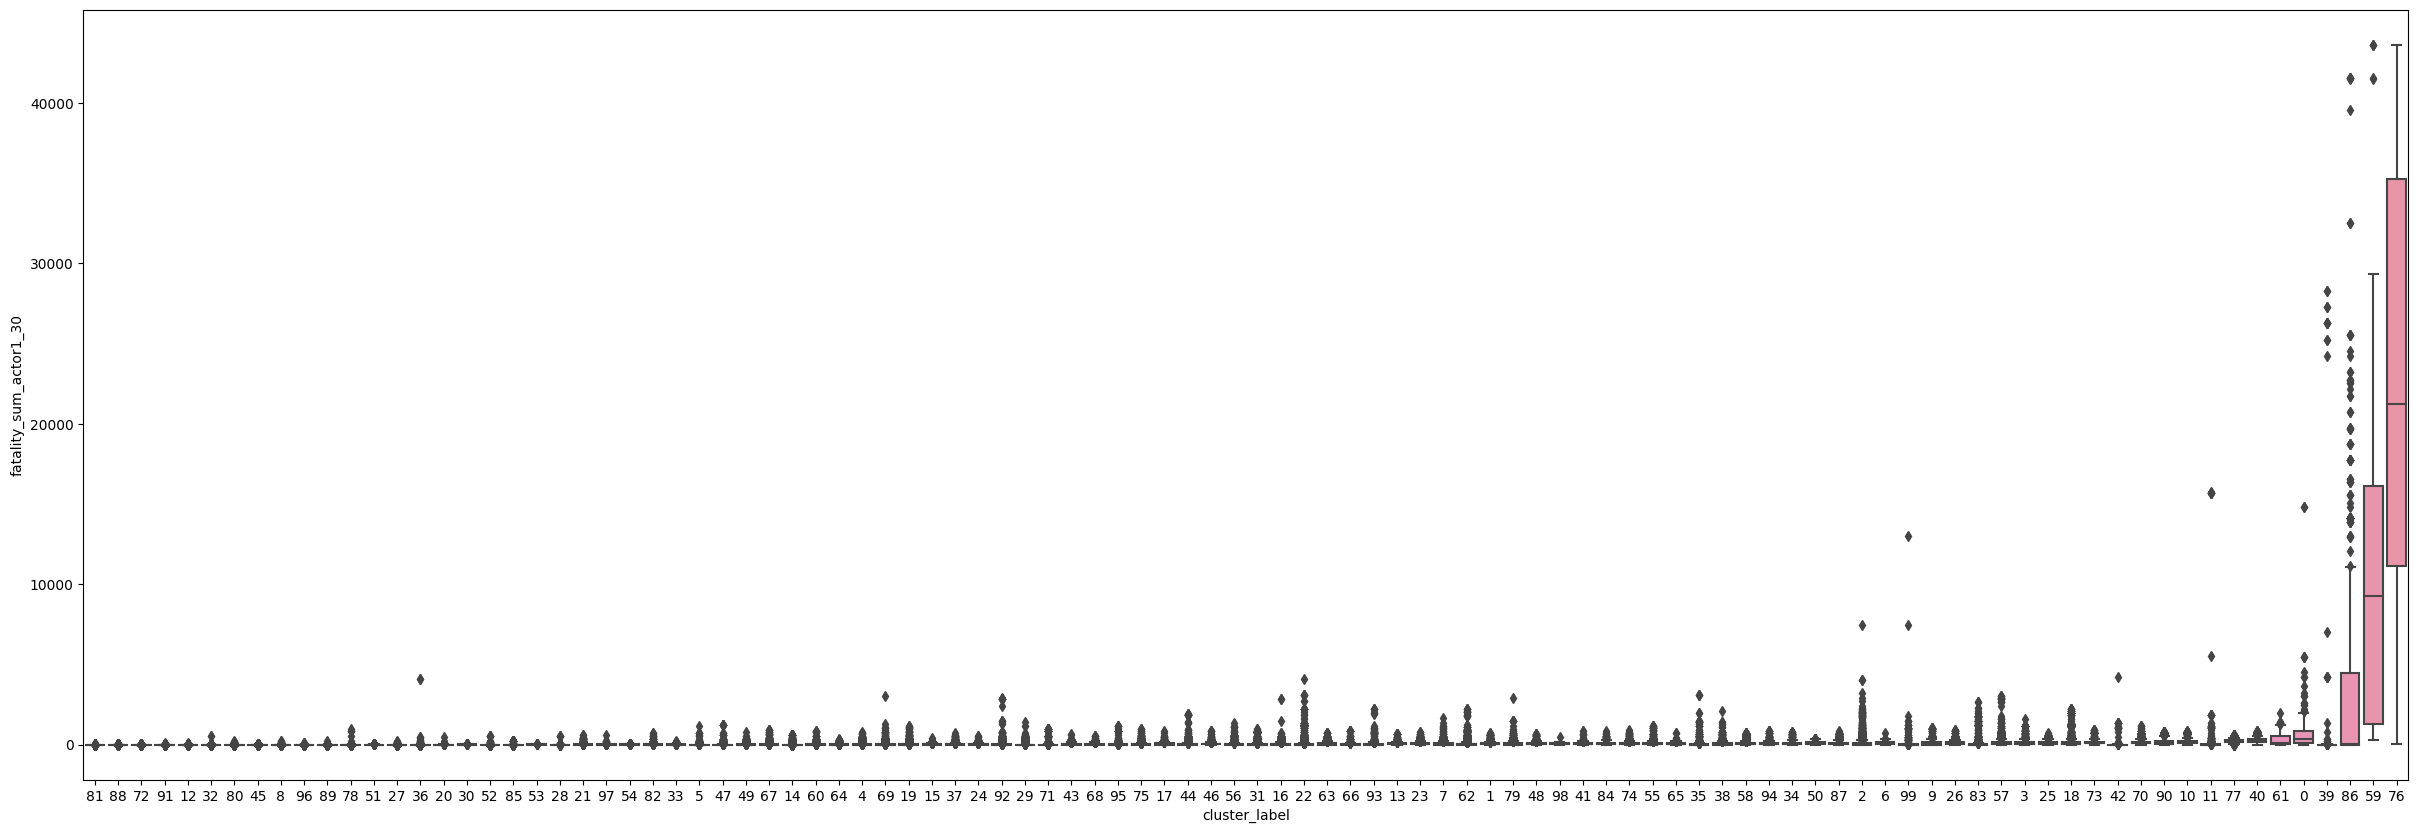

In [73]:
ClusterDisplay('fatality_sum_actor1_30')

### Level10: fatality sum actor1 & interaction

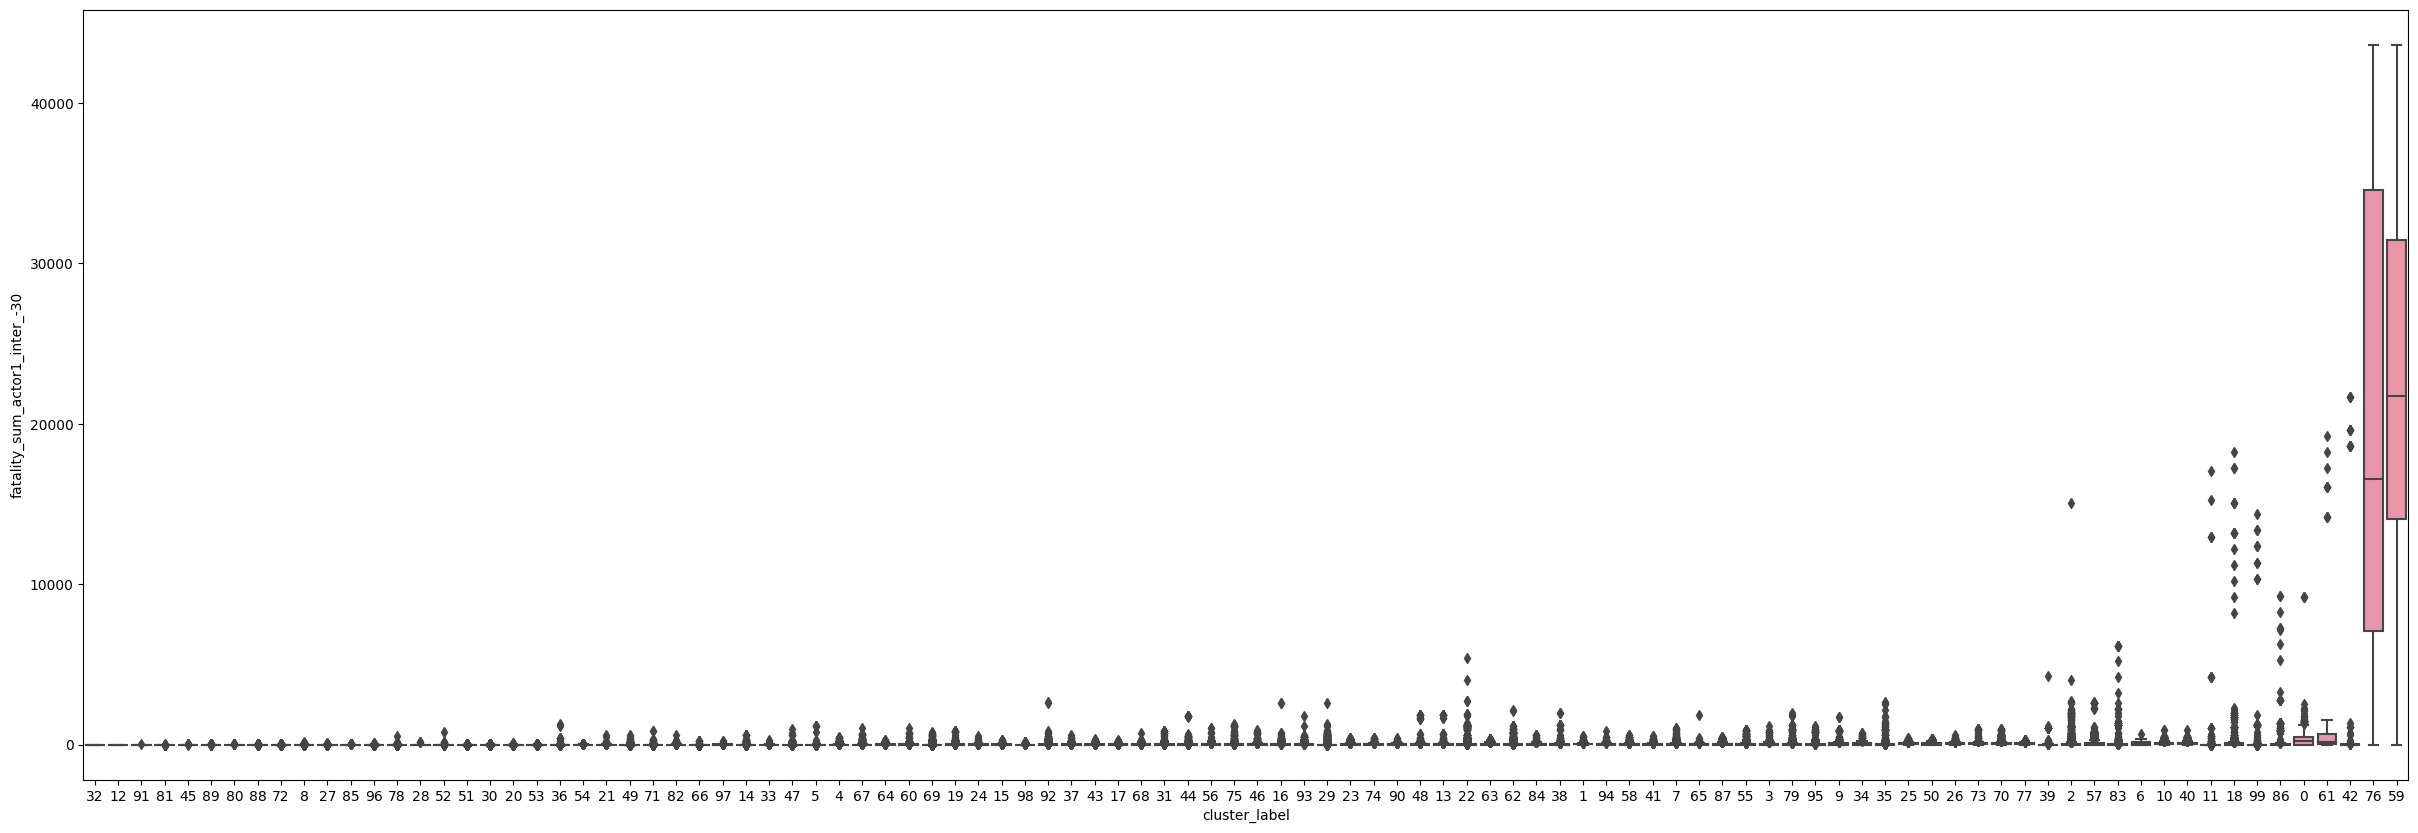

In [74]:
ClusterDisplay('fatality_sum_actor1_inter_-30')

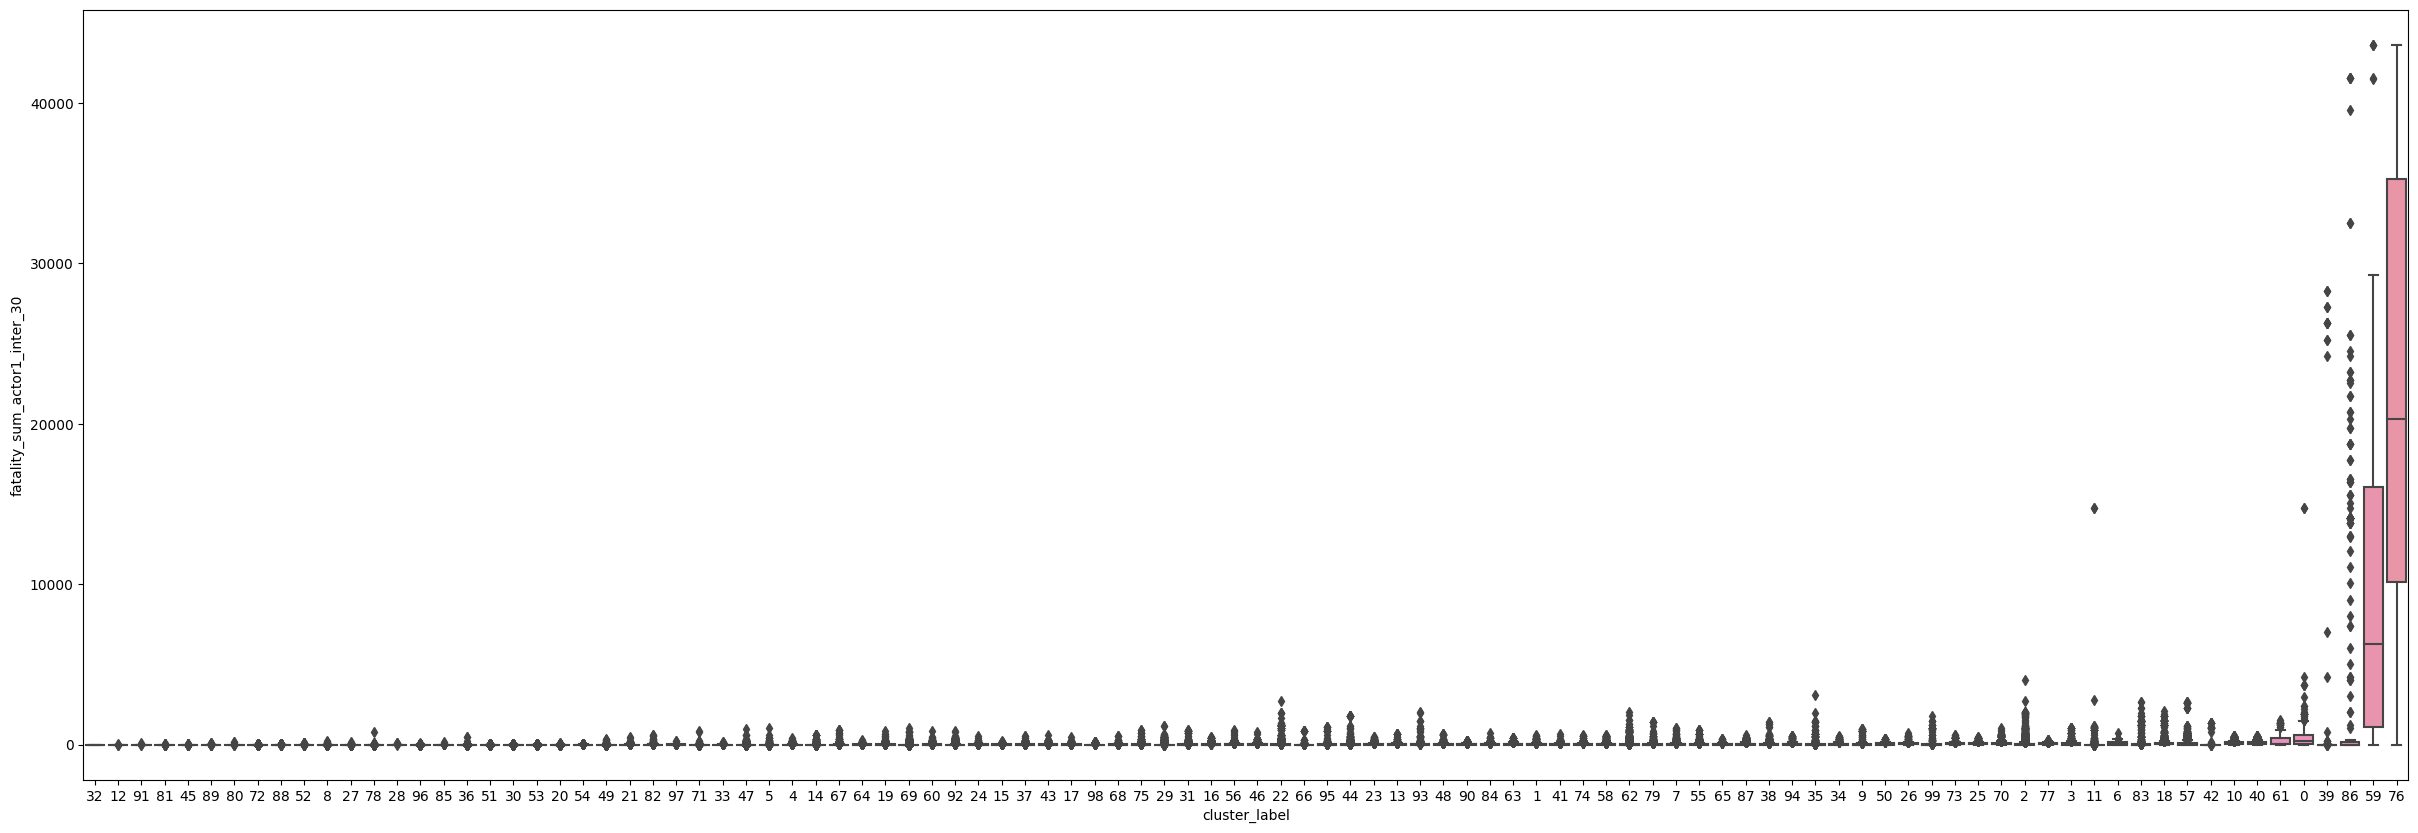

In [75]:
ClusterDisplay('fatality_sum_actor1_inter_30')